<h1><center>Analisis CRISP-DM: "Rain in Australia"</center></h1> 
<img src="./aust2.jpg" width="100%" height="300" title="Title" autoplay muted loop><io>

### **Equipo: The Shield + bello - Veneco**

**Integrantes:** 
* Cristian Contreras
* Alejandro Ferrera
* Diego Gieminiani

**Docente:**     NOMBRE DEL PROFE

## Fase 1: Business Understanding 

### Contexto del Caso
#### Predicción de la Lluvia en Australia

El objetivo de este proyecto es desarrollar un modelo predictivo para pronosticar la cantidad de lluvia y la probabilidad de lluvia al día siguiente en diversas ubicaciones de Australia. Utilizando el conjunto de datos "Rain in Australia"

### Carga de dataset y dependencias

In [1322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# import KNNImputer from scikit-learn
from sklearn.impute import KNNImputer



#Carga de dataset
#usar plot modo claro
df = pd.read_csv('https://raw.githubusercontent.com/Nandocho8/Mineria/main/rain_to_australia/temperatura.csv', sep=',', low_memory=False)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

Teniendo asi la información de las columnas

| Variable       | Descripción                                                   | Columna dataset  |
|----------------|---------------------------------------------------------------|------------------|
| Fecha          | Fecha de la observación                                       | Date             |
| Ubicación      | Ubicación de la estación meteorológica                        | Location         |
| MinTemp        | Temperatura mínima en grados Celsius                          | MinTemp          |
| MaxTemp        | Temperatura máxima en grados Celsius                          | MaxTemp          |
| Lluvia         | Cantidad de lluvia registrada ese día en mm.                  | Rainfall         |
| Evaporación    | Evaporación (mm) en 24 horas                                  | Evaporation      |
| Sol            | Número de horas de sol brillante en el día                    | Sunshine         |
| DirRafaga      | Dirección de la ráfaga de viento más fuerte en 24 horas       | WindGustDir      |
| VelRafaga      | Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas| WindGustSpeed    |
| Dir9am         | Dirección del viento a las 9am                                | WindDir9am       |
| Dir3pm         | Dirección del viento a las 3pm                                | WindDir3pm       |
| Vel9am         | Velocidad (km/hr) del viento a las 9am                        | WindSpeed9am     |
| Vel3pm         | Velocidad (km/hr) del viento a las 3pm                        | WindSpeed3pm     |
| Hum9am         | Porcentaje de humedad a las 9am                               | Humidity9am      |
| Hum3pm         | Porcentaje de humedad a las 3pm                               | Humidity3pm      |
| Pres9am        | Presión atmosférica (hpa) a nivel del mar a las 9am           | Pressure9am      |
| Pres3pm        | Presión atmosférica (hpa) a nivel del mar a las 3pm           | Pressure3pm      |
| Nub9am         | Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. | Cloud9am         |
| Nub3pm         | Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. | Cloud3pm         |
| Temp9am        | Temperatura en grados Celsius a las 9am                       | Temp9am          |
| Temp3pm        | Temperatura en grados Celsius a las 3pm                       | Temp3pm          |
| Lluvia Hoy     | Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no. | RainToday        |
| RISK_MM        | La cantidad de lluvia. Una especie de medida del "riesgo".    | RISK_MM          |
| Lluvia Man     | Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no | RainTomorrow     |

**Teniendo asi que predecir las columnas *RISK_MM* y *RainTomorrow*.**


In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**El dataset consta de 142.193 rows y 24 columns, con la información entregada notamos que deberemos realizar un modelo predictivo de regresión para RISK_MM y de clasificación para RainTomorrrow.** 

## Fase 2: Data Understanding 

### Analisis Estadistico

#### Analisis de las variables numéricas

In [1324]:
df.describe().T


count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189   2.887016    0.0     1.0     5.0   
Cloud3pm        85099.0     4.503167   2.720633    0.0     2.0     5.0   
Temp9am        141289.0    16.987509   6.492838   -7.2    12.3    16.7   
Temp3pm        139467.0    21.687235   6.937594   -5.4    16.6    21.1   
RISK_MM        142193.0     2.360682   8.477969    0.0     0.0     0.0   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7  
RISK_MM           0.8   371.0

#### Analisis de las variables categoricas

In [1325]:
df.describe(include='object').T


count unique         top    freq
Date          142193   3436  2013-12-01      49
Location      142193     49    Canberra    3418
WindGustDir   132863     16           W    9780
WindDir9am    132180     16           N   11393
WindDir3pm    138415     16          SE   10663
RainToday     140787      2          No  109332
RainTomorrow  142193      2          No  110316

### Correlacion de los datos

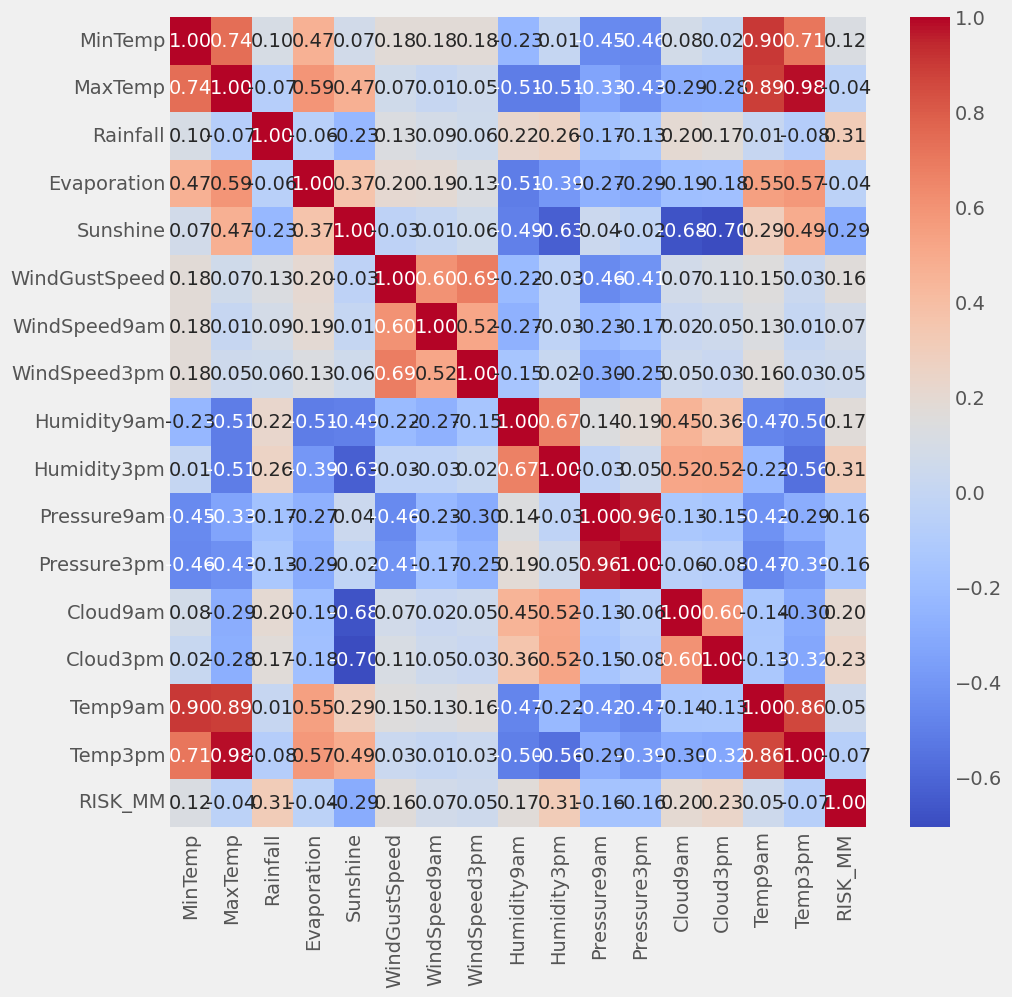

In [1326]:
# # matriz de corelacion de las variables  numericas menos fecha

# dataset solo de columnas tipo float
# crear un df_correlation con todo el data set menos con date y location
df_correlation = df.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainTomorrow', 'RainToday'], axis=1)
# crear una matriz de correlacion
correlation = df_correlation.corr()
# graficar la matriz de correlacion
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


### Tipos de datos


#### 1. Gráfico por tipo de datos 

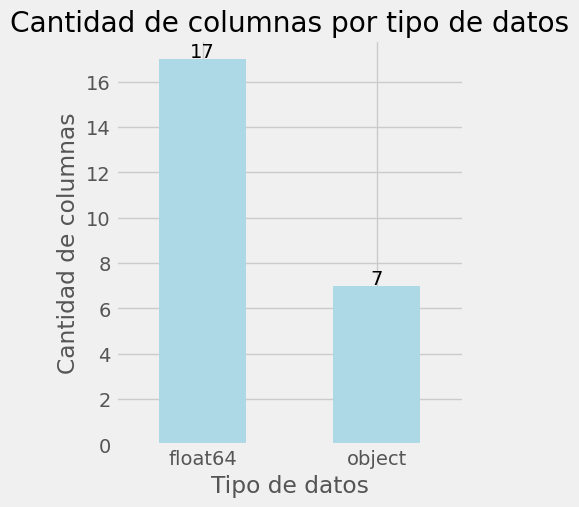

In [1327]:
# grafico de barra para ver el tipo de datos de las columnas pero en modo oscuro y que arriba diga la cantidad de datos y las columnas sean de color celeste
plt.style.use('dark_background')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

type_counts = df.dtypes.value_counts()
plt.figure(figsize=(4, 5))
ax = type_counts.plot(kind='bar', color='lightblue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black', )


plt.title('Cantidad de columnas por tipo de datos', color='black')
plt.xlabel('Tipo de datos')
plt.ylabel('Cantidad de columnas')
plt.xticks(rotation=0)
plt.show()


In [1328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### 2. Revisión de datos tipo float

In [1329]:
# dataset solo de columnas tipo float
df_float = df.select_dtypes(include=['float64'])
## dataset con la columna, cantidad total de valores, la cantidad de nulos y el porcentaje de nulos
df_float_info = pd.DataFrame(df_float.columns, columns=['column_name'])
df_float_info['total_values'] = df_float.count().values + df_float.isnull().sum().values
df_float_info['null_values'] = df_float.isnull().sum().values
df_float_info['null_percentage'] = (df_float.isnull().sum().values / (df_float.count().values + df_float.isnull().sum().values)) * 100
df_float_info.sort_values(by='null_percentage', ascending=False, inplace=True)
df_float_info.reset_index(drop=True, inplace=True)
list_columns = df_float.columns.to_list()
df_float_info



column_name  total_values  null_values  null_percentage
0        Sunshine        142193        67816        47.692924
1     Evaporation        142193        60843        42.789026
2        Cloud3pm        142193        57094        40.152469
3        Cloud9am        142193        53657        37.735332
4     Pressure9am        142193        14014         9.855619
5     Pressure3pm        142193        13981         9.832411
6   WindGustSpeed        142193         9270         6.519308
7     Humidity3pm        142193         3610         2.538803
8         Temp3pm        142193         2726         1.917113
9    WindSpeed3pm        142193         2630         1.849599
10    Humidity9am        142193         1774         1.247600
11       Rainfall        142193         1406         0.988797
12   WindSpeed9am        142193         1348         0.948007
13        Temp9am        142193          904         0.635756
14        MinTemp        142193          637         0.447983
15        MaxTemp        142193          322         0.226453
16        RISK_MM        142193            0         0.000000

Se recomienda ***imputar por la media todas las columnas menores al 11%*** y ***predecir las mayores de 60%*** 

In [1330]:
def graph_iqr_outliers(ax, df , col , outlier_range):
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    lower_bound = q25 -  outlier_range* iqr
    upper_bound = q75 + outlier_range * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    percentage = outliers / df[col].count() * 100
    sns.boxplot(x=df[col], color='lightblue', ax=ax)
    ax.set_title(f'{col}\n{outlier_range} IQR', color='black')
    ax.axvline(lower_bound, color='red', linestyle='--')
    ax.axvline(upper_bound, color='red', linestyle='--')
    print(f"Si tomamos {outlier_range} veces el rango intercuartílico, los límites son {lower_bound:.2f} y {upper_bound:.2f}. Tenemos {outliers:.0f} outliers, lo que representa un {percentage:.2f}% del total de valores.")

    return outliers


#### LOL


Si tomamos 1.5 veces el rango intercuartílico, los límites son -6.20 y 30.60. Tenemos 62 outliers, lo que representa un 0.04% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -20.00 y 44.40. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


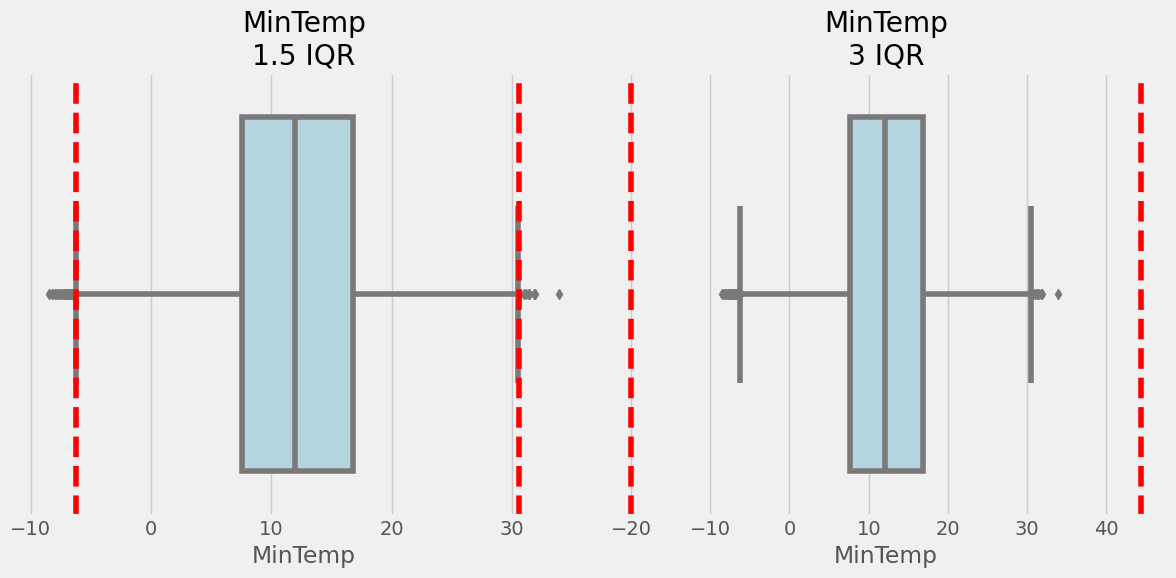

Si tomamos 1.5 veces el rango intercuartílico, los límites son 2.45 y 43.65. Tenemos 459 outliers, lo que representa un 0.32% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -13.00 y 59.10. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


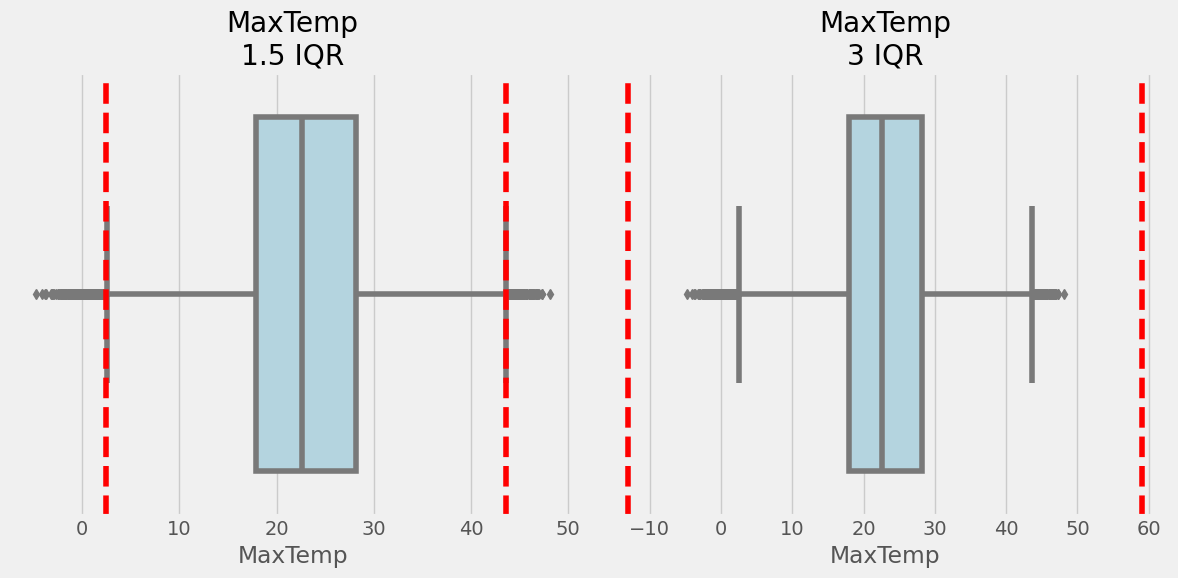

Si tomamos 1.5 veces el rango intercuartílico, los límites son -1.20 y 2.00. Tenemos 25228 outliers, lo que representa un 17.92% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -2.40 y 3.20. Tenemos 20462 outliers, lo que representa un 14.53% del total de valores.


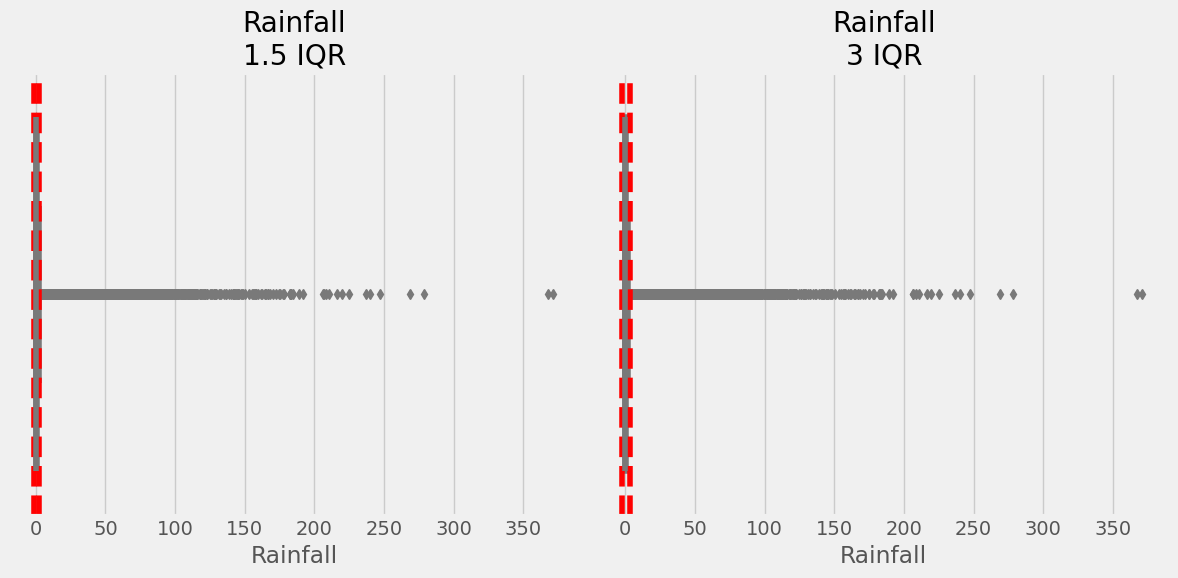

Si tomamos 1.5 veces el rango intercuartílico, los límites son -4.60 y 14.60. Tenemos 1954 outliers, lo que representa un 2.40% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -11.80 y 21.80. Tenemos 471 outliers, lo que representa un 0.58% del total de valores.


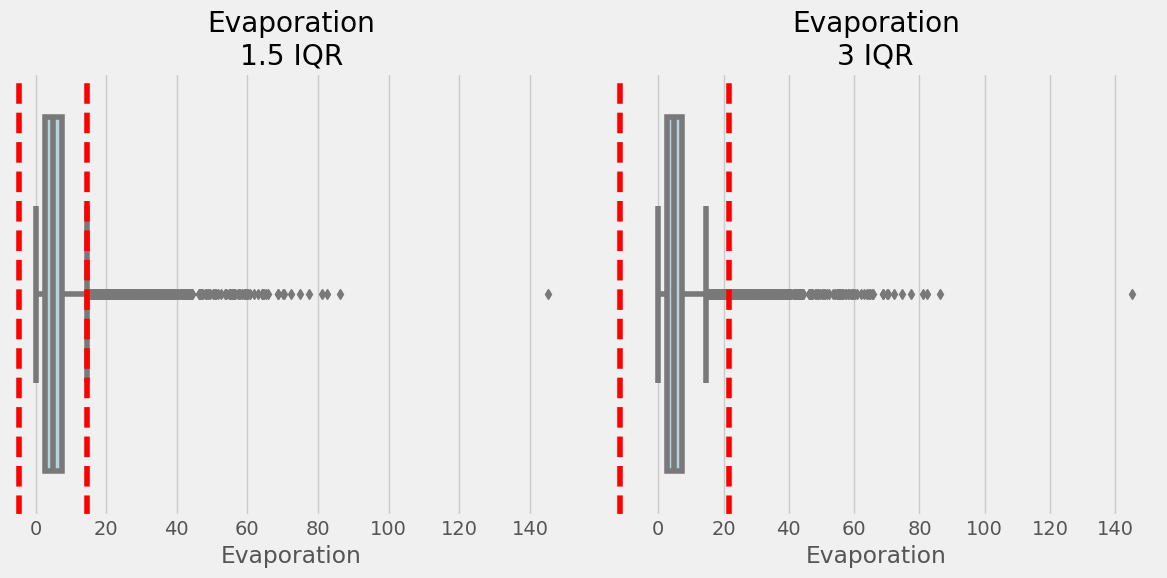

Si tomamos 1.5 veces el rango intercuartílico, los límites son -3.65 y 19.15. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -12.20 y 27.70. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


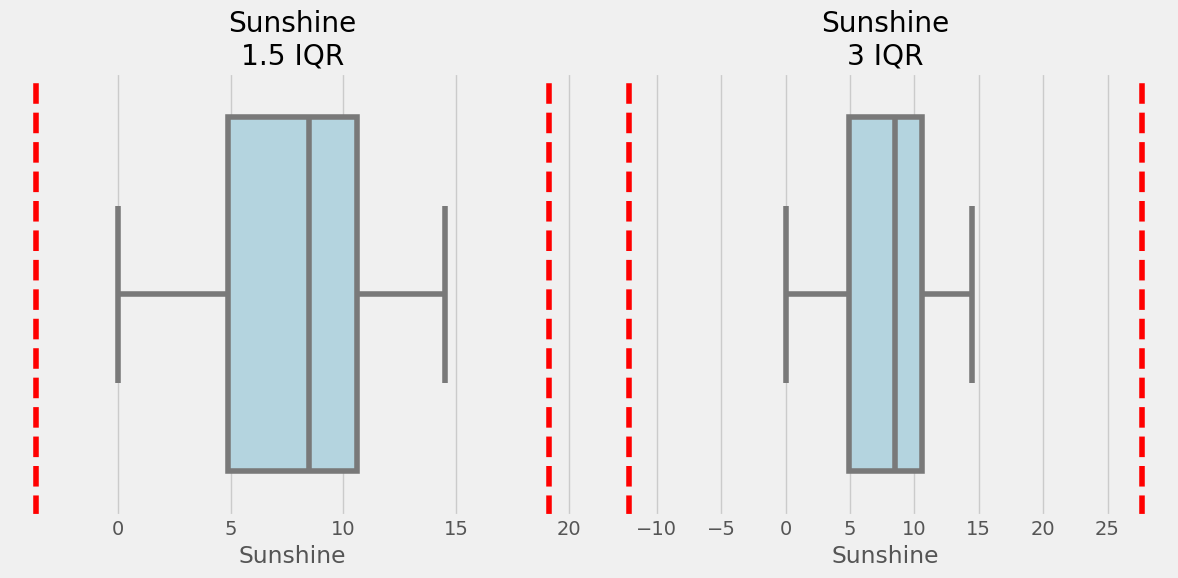

Si tomamos 1.5 veces el rango intercuartílico, los límites son 5.50 y 73.50. Tenemos 3006 outliers, lo que representa un 2.26% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -20.00 y 99.00. Tenemos 150 outliers, lo que representa un 0.11% del total de valores.


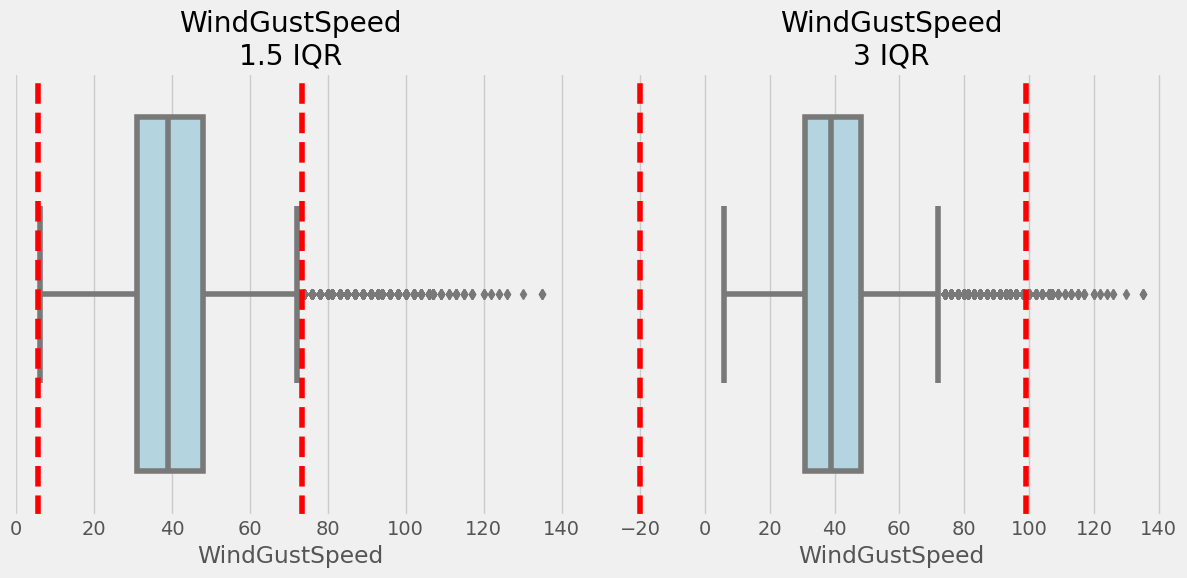

Si tomamos 1.5 veces el rango intercuartílico, los límites son -11.00 y 37.00. Tenemos 1739 outliers, lo que representa un 1.23% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -29.00 y 55.00. Tenemos 107 outliers, lo que representa un 0.08% del total de valores.


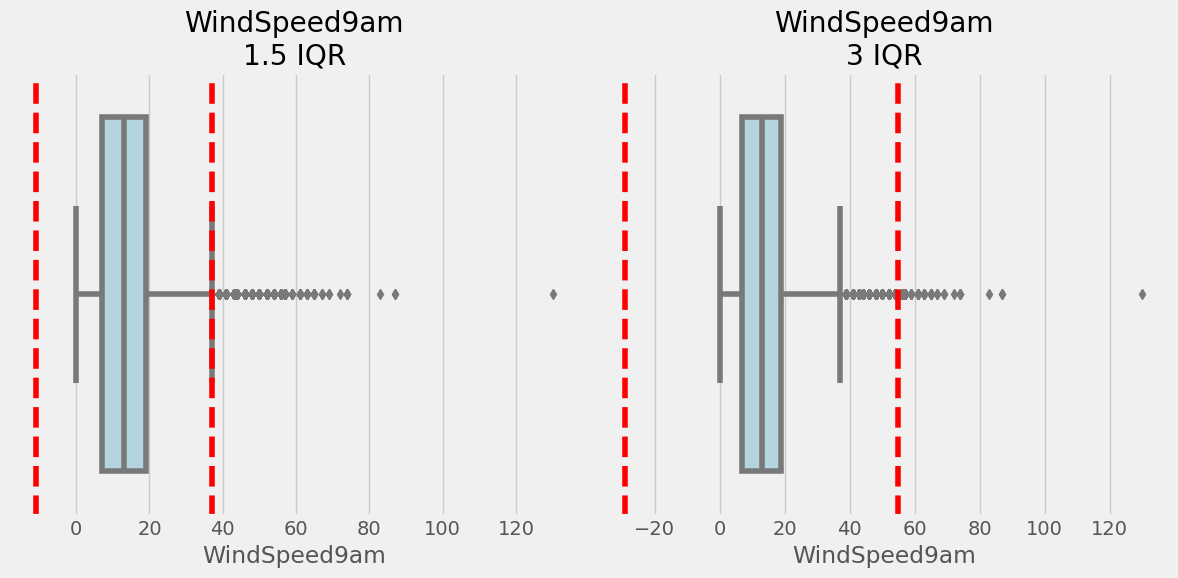

Si tomamos 1.5 veces el rango intercuartílico, los límites son -3.50 y 40.50. Tenemos 2458 outliers, lo que representa un 1.76% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -20.00 y 57.00. Tenemos 81 outliers, lo que representa un 0.06% del total de valores.


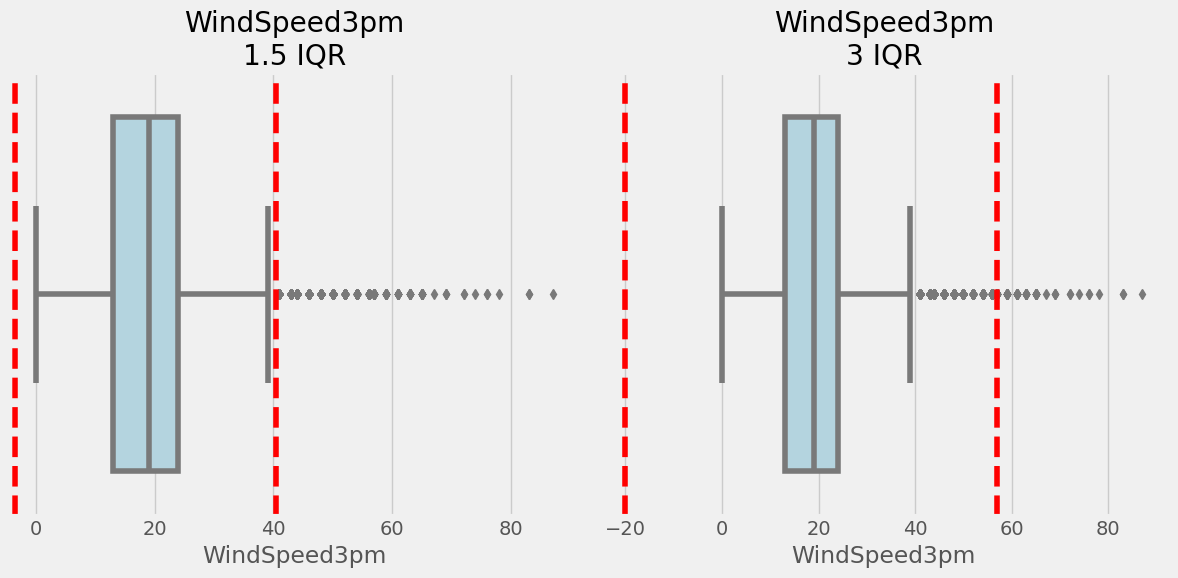

Si tomamos 1.5 veces el rango intercuartílico, los límites son 18.00 y 122.00. Tenemos 1419 outliers, lo que representa un 1.01% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -21.00 y 161.00. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


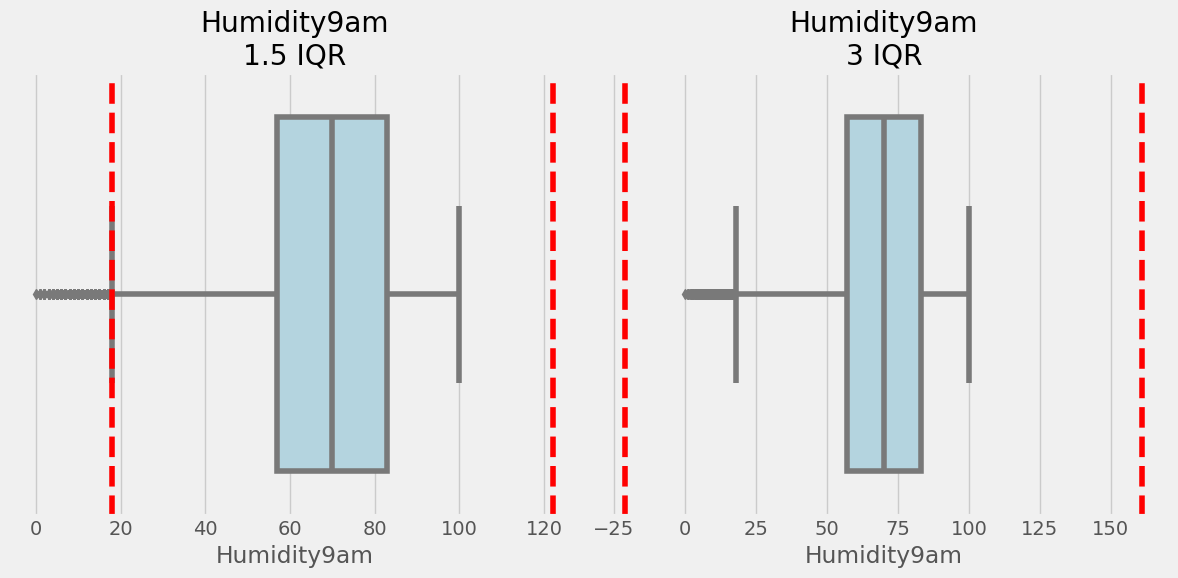

Si tomamos 1.5 veces el rango intercuartílico, los límites son -6.50 y 109.50. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -50.00 y 153.00. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


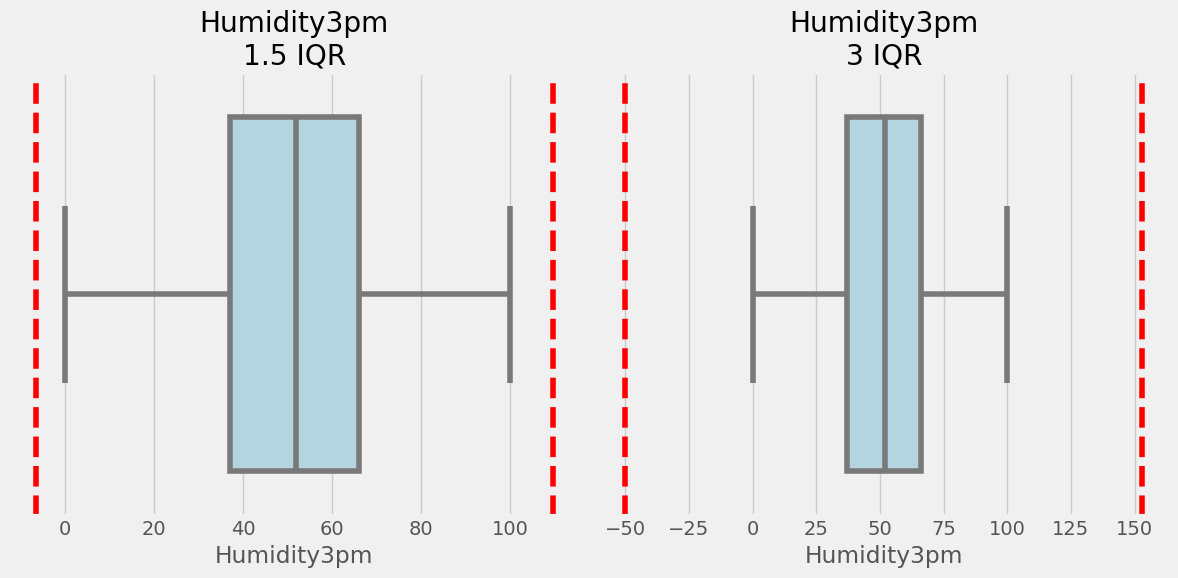

Si tomamos 1.5 veces el rango intercuartílico, los límites son 998.65 y 1036.65. Tenemos 1174 outliers, lo que representa un 0.92% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son 984.40 y 1050.90. Tenemos 8 outliers, lo que representa un 0.01% del total de valores.


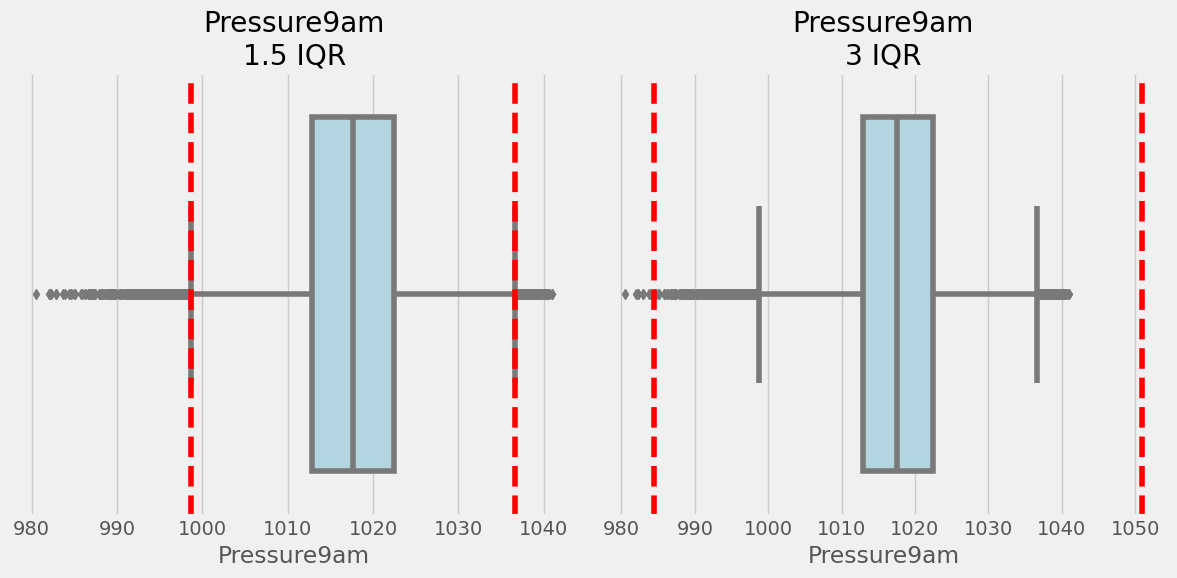

Si tomamos 1.5 veces el rango intercuartílico, los límites son 996.00 y 1034.40. Tenemos 906 outliers, lo que representa un 0.71% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son 981.60 y 1048.80. Tenemos 7 outliers, lo que representa un 0.01% del total de valores.


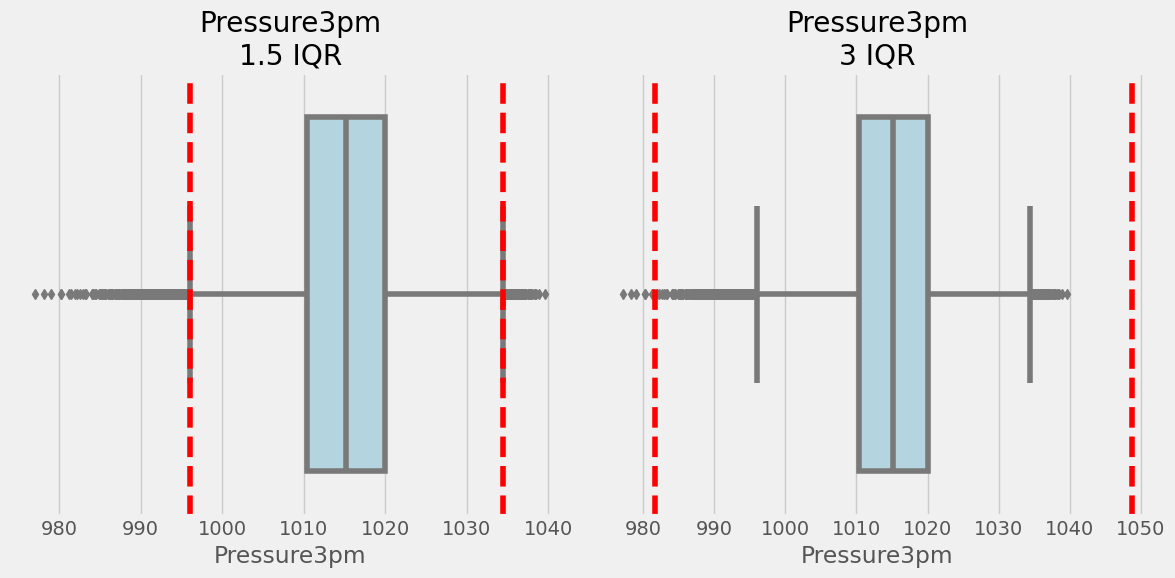

Si tomamos 1.5 veces el rango intercuartílico, los límites son -8.00 y 16.00. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -17.00 y 25.00. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


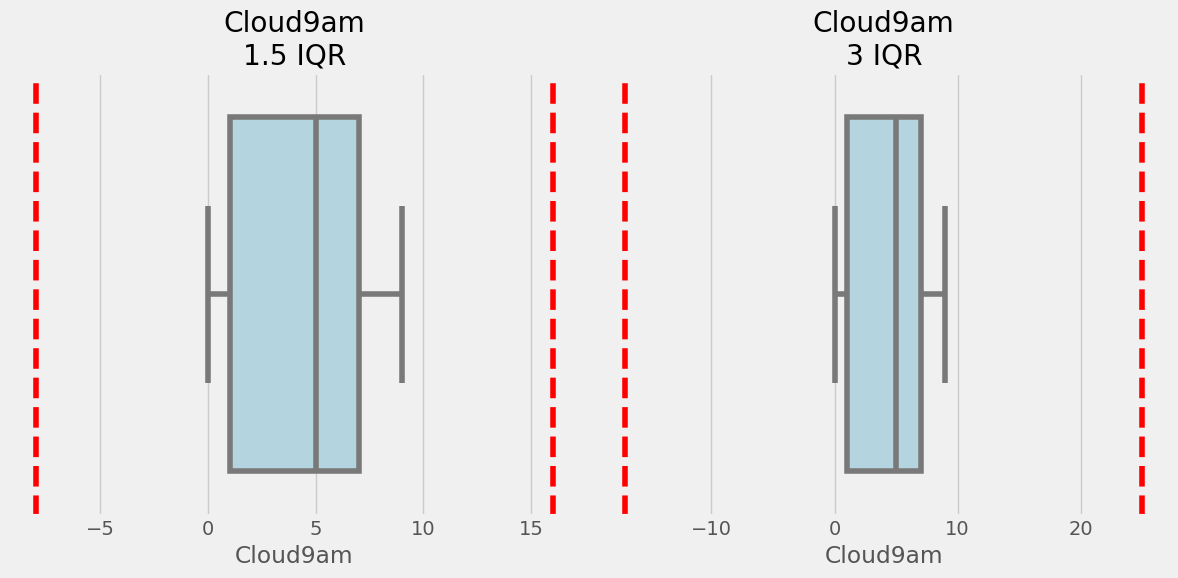

Si tomamos 1.5 veces el rango intercuartílico, los límites son -5.50 y 14.50. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -13.00 y 22.00. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


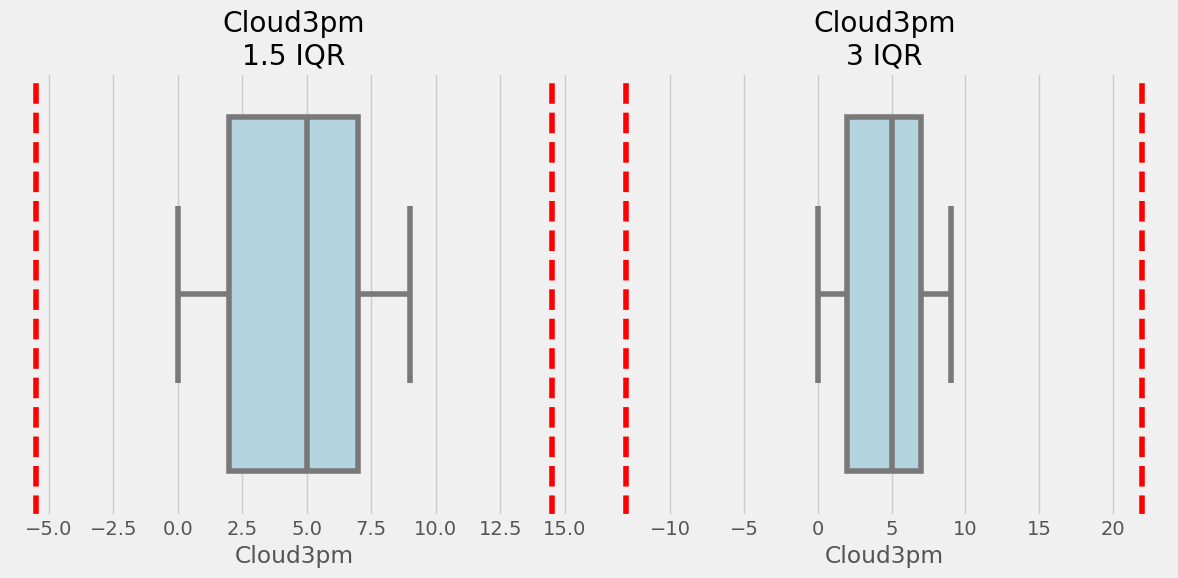

Si tomamos 1.5 veces el rango intercuartílico, los límites son -1.65 y 35.55. Tenemos 247 outliers, lo que representa un 0.17% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -15.60 y 49.50. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


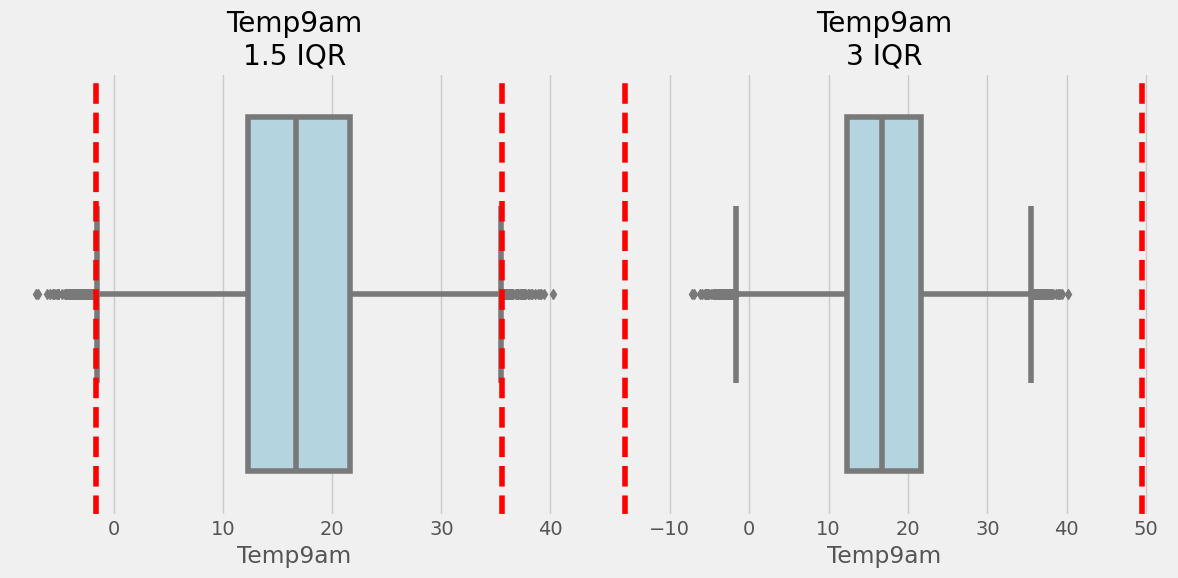

Si tomamos 1.5 veces el rango intercuartílico, los límites son 1.90 y 41.10. Tenemos 735 outliers, lo que representa un 0.53% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -12.80 y 55.80. Tenemos 0 outliers, lo que representa un 0.00% del total de valores.


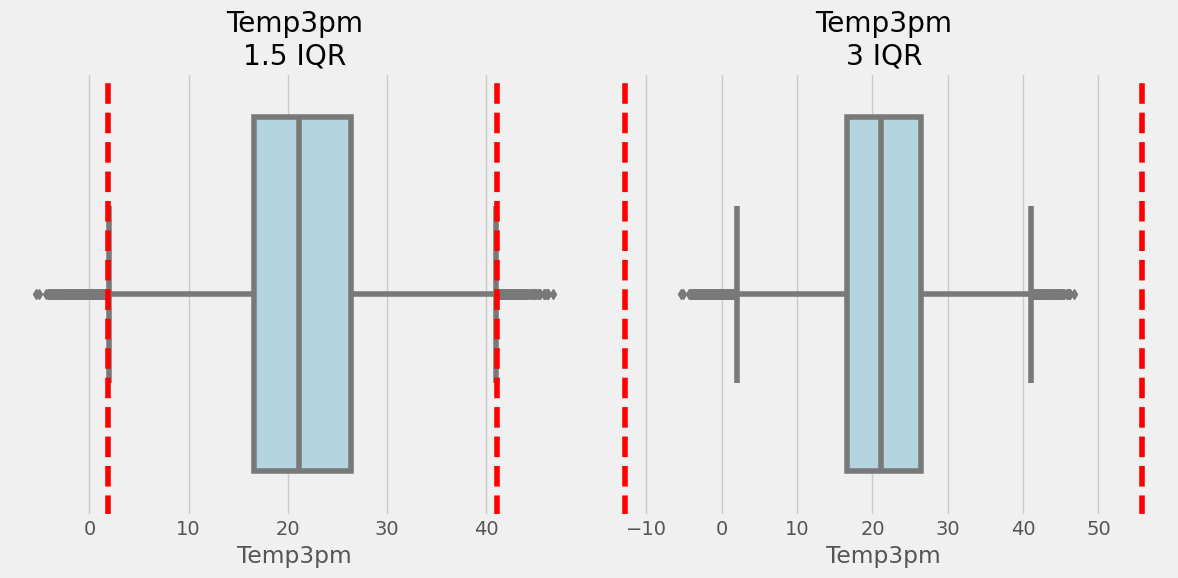

Si tomamos 1.5 veces el rango intercuartílico, los límites son -1.20 y 2.00. Tenemos 25573 outliers, lo que representa un 17.98% del total de valores.
Si tomamos 3 veces el rango intercuartílico, los límites son -2.40 y 3.20. Tenemos 20758 outliers, lo que representa un 14.60% del total de valores.


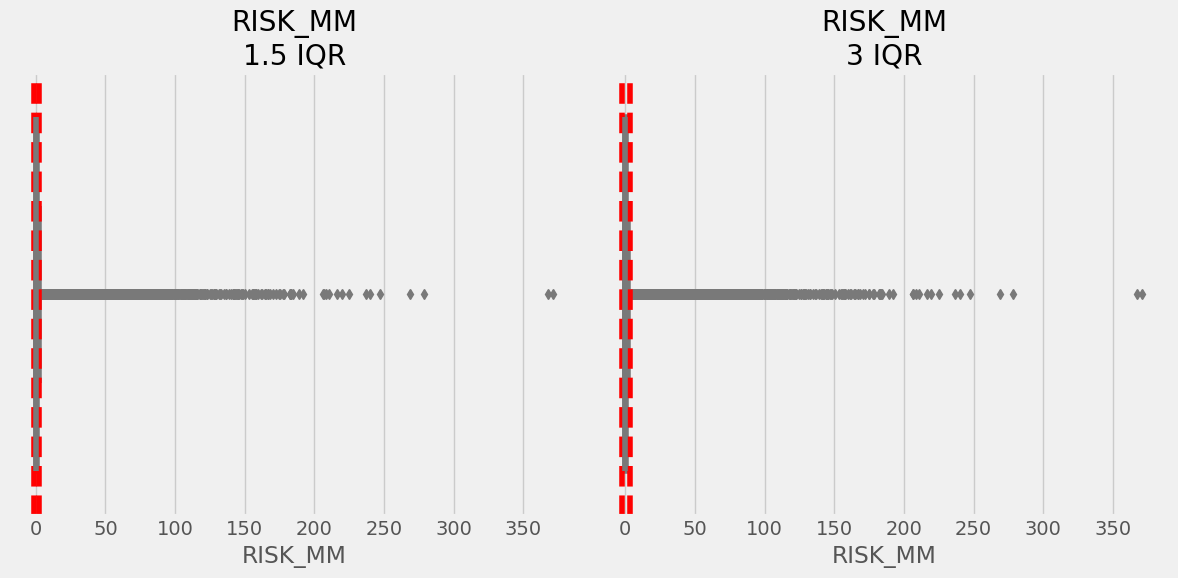

[{'column': 'MinTemp', 'outliers_15': 62, 'outliers_30': 0},
 {'column': 'MaxTemp', 'outliers_15': 459, 'outliers_30': 0},
 {'column': 'Rainfall', 'outliers_15': 25228, 'outliers_30': 20462},
 {'column': 'Evaporation', 'outliers_15': 1954, 'outliers_30': 471},
 {'column': 'Sunshine', 'outliers_15': 0, 'outliers_30': 0},
 {'column': 'WindGustSpeed', 'outliers_15': 3006, 'outliers_30': 150},
 {'column': 'WindSpeed9am', 'outliers_15': 1739, 'outliers_30': 107},
 {'column': 'WindSpeed3pm', 'outliers_15': 2458, 'outliers_30': 81},
 {'column': 'Humidity9am', 'outliers_15': 1419, 'outliers_30': 0},
 {'column': 'Humidity3pm', 'outliers_15': 0, 'outliers_30': 0},
 {'column': 'Pressure9am', 'outliers_15': 1174, 'outliers_30': 8},
 {'column': 'Pressure3pm', 'outliers_15': 906, 'outliers_30': 7},
 {'column': 'Cloud9am', 'outliers_15': 0, 'outliers_30': 0},
 {'column': 'Cloud3pm', 'outliers_15': 0, 'outliers_30': 0},
 {'column': 'Temp9am', 'outliers_15': 247, 'outliers_30': 0},
 {'column': 'Temp3pm

In [1331]:
warnings.filterwarnings("ignore", category=FutureWarning)
info_outliers = []
for col in df_float.columns:
    fig , axs = plt.subplots(1, 2, figsize=(12, 6))
    out_15 = graph_iqr_outliers(axs[0],df_float, col, 1.5)
    out_30 = graph_iqr_outliers(axs[1],df_float, col, 3)
    info_outliers.append({'column': col, 'outliers_15': out_15, 'outliers_30': out_30})
    plt.tight_layout()
    plt.show()

info_outliers
    

Se recomienda utilizar los ***outliers con 3 IQR***

#### 3. Revisión de datos tipo object


Función para grafico de barras de variables categoricas contando los nulos

In [1332]:
def grafica_categoricos_null(column, df):
    # Obtener los valores únicos de la columna
    unique = df[column].value_counts().reset_index()
    # Renombrar las columnas
    unique.columns = [column, 'Count']
    # Contar los valores nulos
    null_count = df[column].isnull().sum()
    # Crear un DataFrame con los valores nulos
    null_row = pd.DataFrame({column: ['NaN'], 'Count': [null_count]})
    # Concatenar los valores únicos con los valores nulos
    unique = pd.concat([unique, null_row], ignore_index=True)
    # Ordenar los valores únicos por la columna Count
    unique = unique.sort_values(by='Count', ascending=False)

    # Calcular el porcentaje para los valores nulos
    total_valores = unique['Count'].sum()
    unique['Percent'] = (unique['Count'] / total_valores) * 100

    # Graficar los valores únicos de la columna en un gráfico de barras
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=column, y='Count', data=unique, palette='pastel', dodge=False)

    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            # Anotar el valor de cada barra
            ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black')
            # Anotar el porcentaje de cada barra
            ax.annotate(f"{height / total_valores * 100:.2f}%", (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, -10), textcoords='offset points', color='black')

    # Rotar las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    plt.title(f'{column}', color='black')
    plt.show()
    
    return unique

##### 3.1 Todas las columnas tipo Object sin nulos

In [1333]:
df_object = df.select_dtypes(include=['object'])
print('Columnas de tipo object')
for col in df_object.columns:
    # imprime el nombre de la columna y la cantidad de valores unicos -> 5 ejemplos
    print(f"Columna {col} tiene {df[col].nunique()} valores unicos no nulos -> {df[col].unique()[:5]}")


Columnas de tipo object
Columna Date tiene 3436 valores unicos no nulos -> ['2008-12-01' '2008-12-02' '2008-12-03' '2008-12-04' '2008-12-05']
Columna Location tiene 49 valores unicos no nulos -> ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree']
Columna WindGustDir tiene 16 valores unicos no nulos -> ['W' 'WNW' 'WSW' 'NE' 'NNW']
Columna WindDir9am tiene 16 valores unicos no nulos -> ['W' 'NNW' 'SE' 'ENE' 'SW']
Columna WindDir3pm tiene 16 valores unicos no nulos -> ['WNW' 'WSW' 'E' 'NW' 'W']
Columna RainToday tiene 2 valores unicos no nulos -> ['No' 'Yes' nan]
Columna RainTomorrow tiene 2 valores unicos no nulos -> ['No' 'Yes']


#### 3.2 Todos los nulos de las columnas tipo Object 

In [1334]:
# contar valores nulos por columna objeto de manera descendente
nulls = df_object.isnull().sum().sort_values(ascending=False)
# calcular el porcentaje de valores nulos por columna como porcentaje con el simbolo %
percent = (df_object.isnull().sum() / df_object.isnull().count()).sort_values(ascending=False) * 100 
# concatenar los valores nulos y el porcentaje
missing_data = pd.concat([nulls, percent], axis=1, keys=['Total', 'Percent'])
# mostrar los valores nulos y el porcentaje
missing_data

Total   Percent
WindDir9am    10013  7.041838
WindGustDir    9330  6.561504
WindDir3pm     3778  2.656952
RainToday      1406  0.988797
Date              0  0.000000
Location          0  0.000000
RainTomorrow      0  0.000000

##### 3.3 Columna Date

La columna date no es relevante para las predicciones solicitadas así que ***se recomienda eliminarla***

##### 3.4 Columna Location

In [1335]:
location_unique = df['Location'].value_counts(dropna=False).reset_index()
location_unique.columns = ['Location', 'Count']
# porcentaje de valores nulos en la columna location
location_unique['Percent'] = (location_unique['Count'] / location_unique['Count'].sum()) * 100
# mostrar los valores unicos de la columna location
location_unique.head(10)

Location  Count   Percent
0      Canberra   3418  2.403775
1        Sydney   3337  2.346810
2         Perth   3193  2.245540
3        Darwin   3192  2.244836
4        Hobart   3188  2.242023
5      Brisbane   3161  2.223035
6      Adelaide   3090  2.173103
7       Bendigo   3034  2.133720
8    Townsville   3033  2.133016
9  AliceSprings   3031  2.131610

Ya que es una variable categorica importante para la predicción se recomiendo realizar ***one-hot encoding***

#### 3.5 Columna WindGustDir

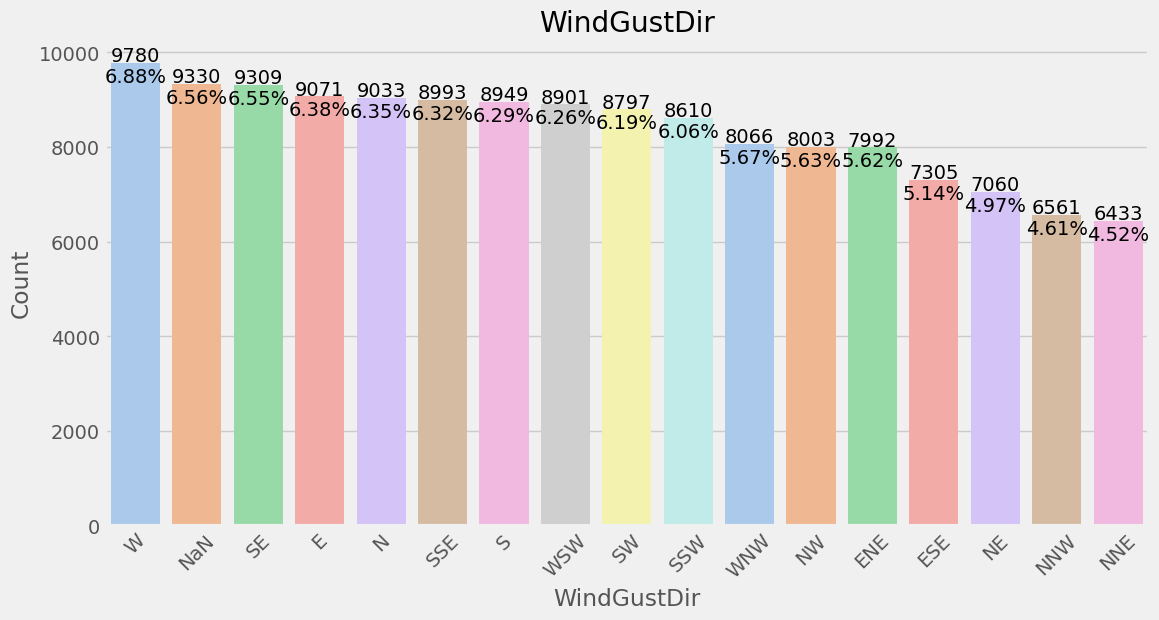

WindGustDir  Count   Percent
0            W   9780  6.877976
16         NaN   9330  6.561504
1           SE   9309  6.546736
2            E   9071  6.379358
3            N   9033  6.352633
4          SSE   8993  6.324503
5            S   8949  6.293559
6          WSW   8901  6.259802
7           SW   8797  6.186662
8          SSW   8610  6.055150

In [1336]:
windgustdir_unique = grafica_categoricos_null('WindGustDir', df)
windgustdir_unique.head(10)


La columna WindGustDir tiene como segundo máximo valor el nulo, así que recomendamos ***imputar por la moda*** ó ***realizar una predicción de la dirección*** 

#### 3.6 Columna WindDir9am

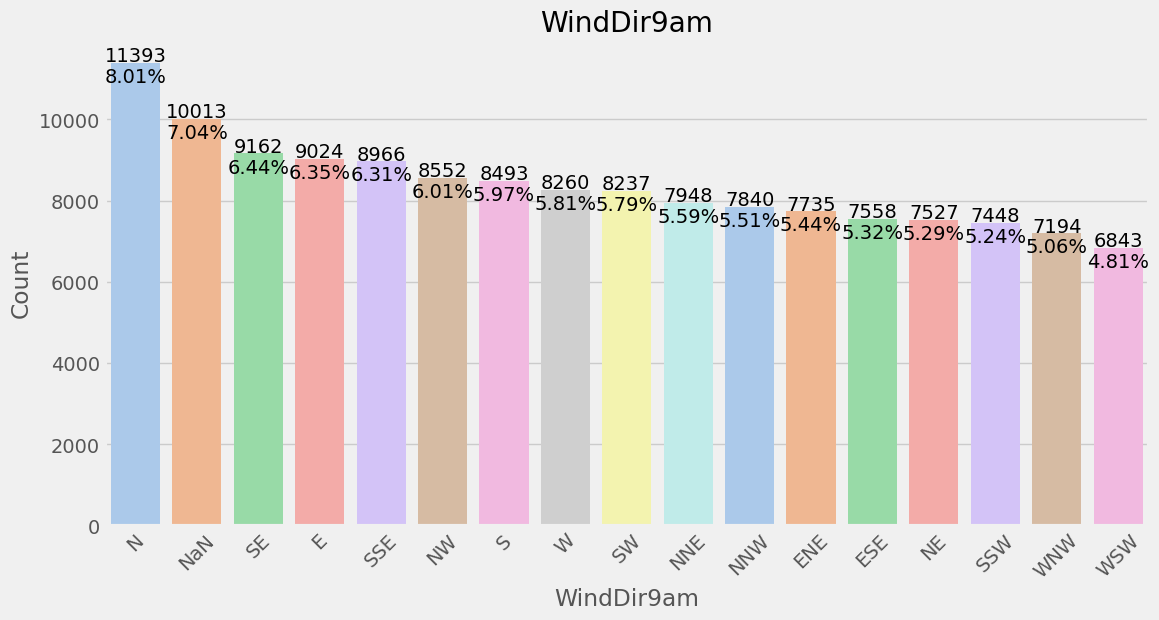

WindDir9am  Count   Percent
0           N  11393  8.012349
16        NaN  10013  7.041838
1          SE   9162  6.443355
2           E   9024  6.346304
3         SSE   8966  6.305514
4          NW   8552  6.014361
5           S   8493  5.972868
6           W   8260  5.809006
7          SW   8237  5.792831
8         NNE   7948  5.589586
9         NNW   7840  5.513633
10        ENE   7735  5.439790
11        ESE   7558  5.315311
12         NE   7527  5.293510
13        SSW   7448  5.237951
14        WNW   7194  5.059321
15        WSW   6843  4.812473

In [1337]:
winddir9am_unique = grafica_categoricos_null('WindDir9am', df)
winddir9am_unique

La columna WindDir9am tiene como segundo máximo valor el nulo, así que recomendamos ***imputar por la moda*** ó ***realizar una predicción de la dirección*** 

#### 3.7 Columna WindDir3pm

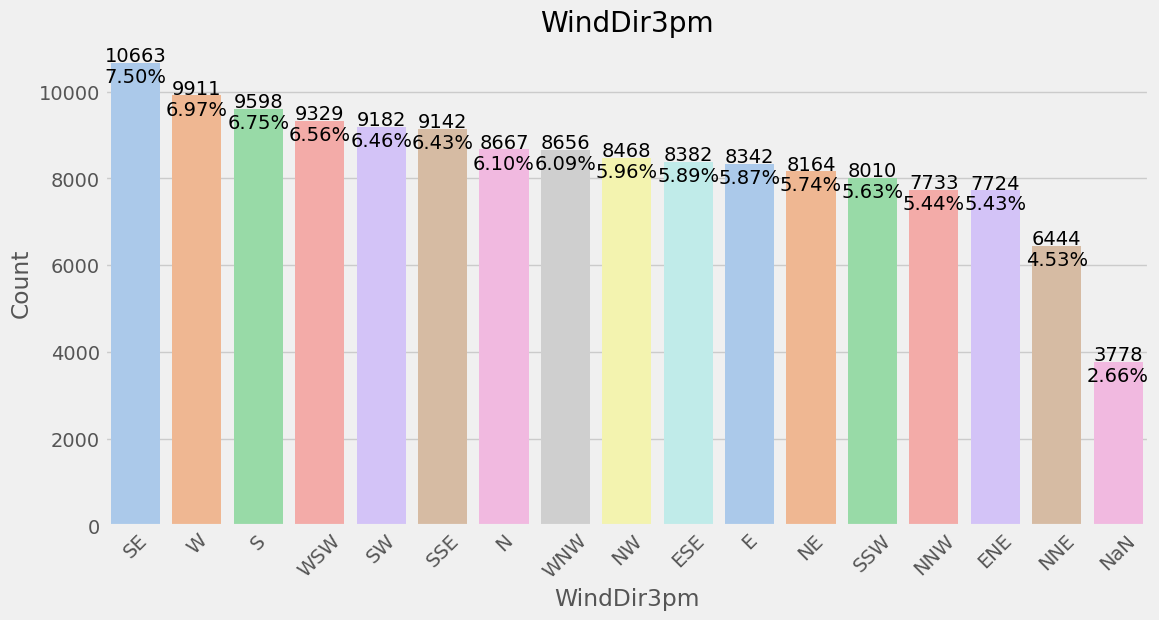

WindDir3pm  Count   Percent
0          SE  10663  7.498963
1           W   9911  6.970104
2           S   9598  6.749981
3         WSW   9329  6.560801
4          SW   9182  6.457421
5         SSE   9142  6.429290
6           N   8667  6.095237
7         WNW   8656  6.087501
8          NW   8468  5.955286
9         ESE   8382  5.894805
10          E   8342  5.866674
11         NE   8164  5.741492
12        SSW   8010  5.633189
13        NNW   7733  5.438383
14        ENE   7724  5.432054
15        NNE   6444  4.531869
16        NaN   3778  2.656952

In [1338]:

winddir3pm_unique = grafica_categoricos_null('WindDir3pm', df)
winddir3pm_unique

La columna WindDir3pm tiene como ultimo valor el nulo, así que recomendamos ***imputar por la moda*** 

#### 3.8 Columna RainToday

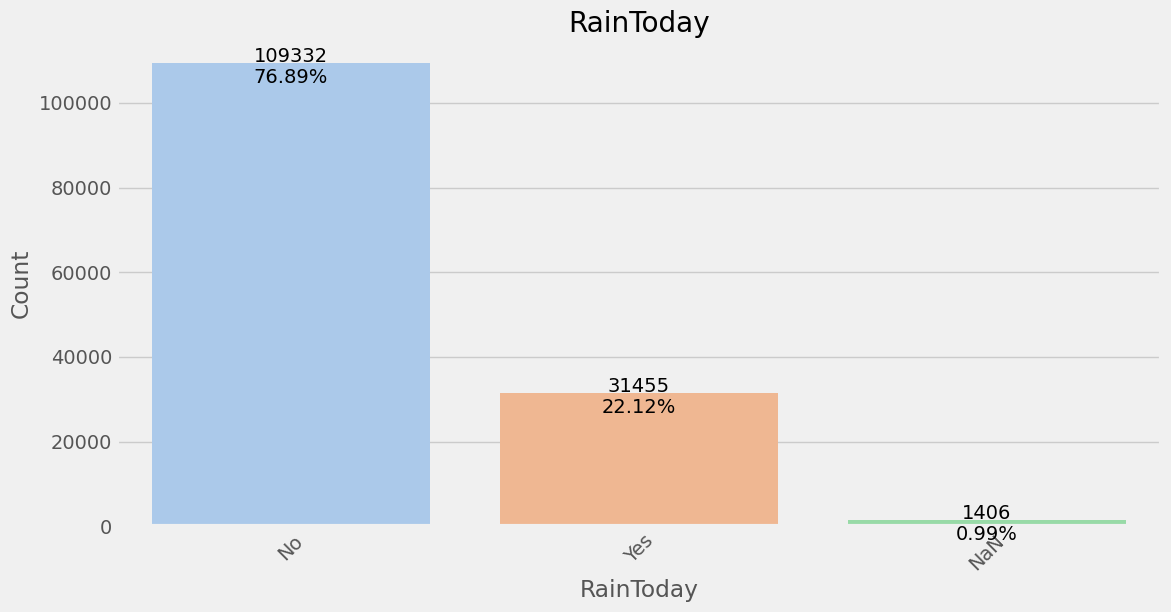

RainToday   Count    Percent
0        No  109332  76.889861
1       Yes   31455  22.121342
2       NaN    1406   0.988797

In [1339]:
## traer un subconjunto de datos de la columna raintoday con coincluyendo los valores nulos y ordenarlos de manera descendente
raintoday_unique = grafica_categoricos_null('RainToday', df)
raintoday_unique

La columna RainToday tiene como ultimo valor el nulo, así que recomendamos ***imputar por la moda*** 

#### 3.9 Columna RainTomorrow

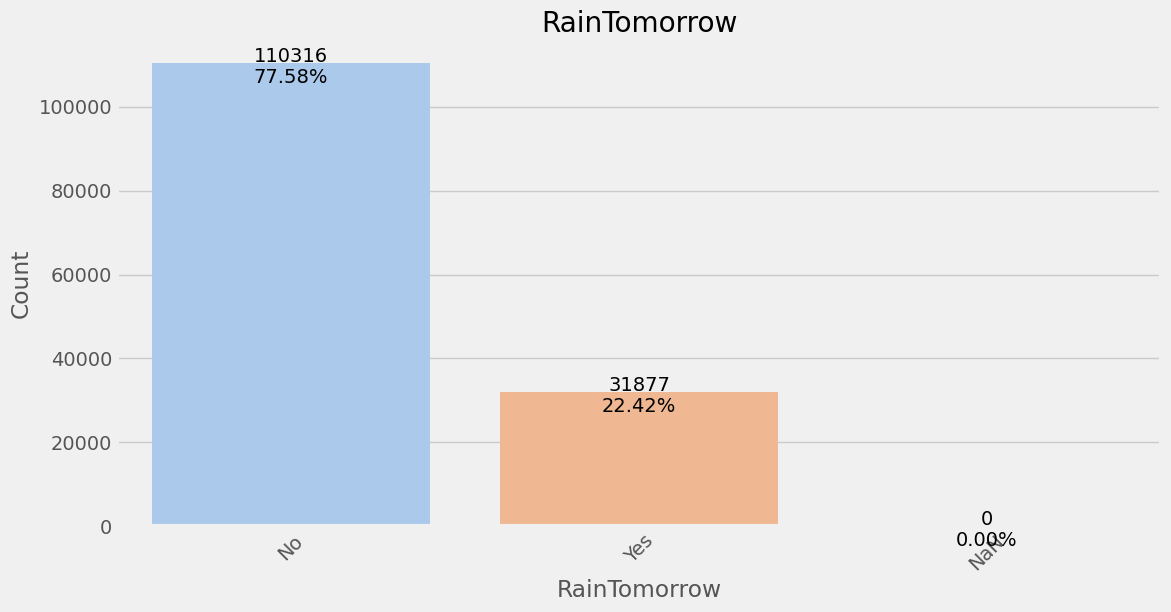

RainTomorrow   Count    Percent
0           No  110316  77.581878
1          Yes   31877  22.418122
2          NaN       0   0.000000

In [1340]:
## traer un subconjunto de datos de la columna rain tomorrow con coincluyendo los valores nulos y ordenarlos de manera descendente
raintomorrow_unique = grafica_categoricos_null('RainTomorrow', df)
raintomorrow_unique

## Fase 3: Data Preparation 

### Transformación, eliminación e imputación de datos

#### 1. Unificación de datos nulos

Debido a que es probable que hayan datos nulos escritos de diferentes maneras, dejaremos todos los datos como np.nan

In [1341]:
na_values = ('np.nan','NA','NaN','nan','inf','NULL')
df = df.replace(na_values, np.nan)

#### 3. Variables Númericas

In [1342]:
list_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [1343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [1344]:
# eliminar los outliers de list_columns en el dataframe df tomando 3 veces el rango intercuartilico imprimir los outliers antes y despues
# list_columns = ['RISK_MM', 'Rainfall']
outliers_count = 0
for col in list_columns:

    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = (q75 - q25)
    lower_bound = q25 - 3.0 * iqr
    upper_bound = q75 + 3.0 * iqr
    outliers_prev = int(df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]) 
    if outliers_prev != 0:
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers_count += outliers_prev
        print(f"Para la columna {col} tenemos {outliers_prev} outliers y se eliminaron {outliers_count} outliers.")
        df.info()
    print(f"Para la columna {col} tenemos {outliers_prev} outliers y se eliminaron {outliers_count} outliers.")


Para la columna MinTemp tenemos 0 outliers y se eliminaron 0 outliers.
Para la columna MaxTemp tenemos 0 outliers y se eliminaron 0 outliers.
Para la columna Rainfall tenemos 20462 outliers y se eliminaron 20462 outliers.
<class 'pandas.core.frame.DataFrame'>
Index: 120325 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           120325 non-null  object 
 1   Location       120325 non-null  object 
 2   MinTemp        119930 non-null  float64
 3   MaxTemp        120060 non-null  float64
 4   Rainfall       120325 non-null  float64
 5   Evaporation    69749 non-null   float64
 6   Sunshine       63258 non-null   float64
 7   WindGustDir    112778 non-null  object 
 8   WindGustSpeed  112818 non-null  float64
 9   WindDir9am     111733 non-null  object 
 10  WindDir3pm     117279 non-null  object 
 11  WindSpeed9am   119433 non-null  float64
 12  WindSpeed3pm   118220 non-null  float

In [1345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53383 entries, 5939 to 140671
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           53383 non-null  object 
 1   Location       53383 non-null  object 
 2   MinTemp        53359 non-null  float64
 3   MaxTemp        53362 non-null  float64
 4   Rainfall       53383 non-null  float64
 5   Evaporation    53383 non-null  float64
 6   Sunshine       45924 non-null  float64
 7   WindGustDir    53377 non-null  object 
 8   WindGustSpeed  53383 non-null  float64
 9   WindDir9am     51167 non-null  object 
 10  WindDir3pm     53198 non-null  object 
 11  WindSpeed9am   53383 non-null  float64
 12  WindSpeed3pm   53383 non-null  float64
 13  Humidity9am    53086 non-null  float64
 14  Humidity3pm    52579 non-null  float64
 15  Pressure9am    53383 non-null  float64
 16  Pressure3pm    53383 non-null  float64
 17  Cloud9am       47127 non-null  float64
 18  Cloud3p

In [1346]:
# lista de columnas que tienen menos del 10% de valores nulos ordenados de manera descendente de df_float
df_float_info = df_float_info[df_float_info['null_percentage'] < 10]
df_float_info


column_name  total_values  null_values  null_percentage
4     Pressure9am        142193        14014         9.855619
5     Pressure3pm        142193        13981         9.832411
6   WindGustSpeed        142193         9270         6.519308
7     Humidity3pm        142193         3610         2.538803
8         Temp3pm        142193         2726         1.917113
9    WindSpeed3pm        142193         2630         1.849599
10    Humidity9am        142193         1774         1.247600
11       Rainfall        142193         1406         0.988797
12   WindSpeed9am        142193         1348         0.948007
13        Temp9am        142193          904         0.635756
14        MinTemp        142193          637         0.447983
15        MaxTemp        142193          322         0.226453
16        RISK_MM        142193            0         0.000000

In [1347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53383 entries, 5939 to 140671
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           53383 non-null  object 
 1   Location       53383 non-null  object 
 2   MinTemp        53359 non-null  float64
 3   MaxTemp        53362 non-null  float64
 4   Rainfall       53383 non-null  float64
 5   Evaporation    53383 non-null  float64
 6   Sunshine       45924 non-null  float64
 7   WindGustDir    53377 non-null  object 
 8   WindGustSpeed  53383 non-null  float64
 9   WindDir9am     51167 non-null  object 
 10  WindDir3pm     53198 non-null  object 
 11  WindSpeed9am   53383 non-null  float64
 12  WindSpeed3pm   53383 non-null  float64
 13  Humidity9am    53086 non-null  float64
 14  Humidity3pm    52579 non-null  float64
 15  Pressure9am    53383 non-null  float64
 16  Pressure3pm    53383 non-null  float64
 17  Cloud9am       47127 non-null  float64
 18  Cloud3p

##### 3.1 Imputación media para las columnas con nulos menores al 11%

Cantidad de nulos

In [1348]:
#imputar los valores unicos de la columna Pressure9am - Pressure3pm - WindGustSpeed - Humidity3pm - Temp3pm - WindSpeed3pm - Humidity9am - Rainfall - WindSpeed9am - Temp9am - MinTemp - MaxTemp con la moda de cada columna
for column in df[list_columns]:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [1349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53383 entries, 5939 to 140671
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           53383 non-null  object 
 1   Location       53383 non-null  object 
 2   MinTemp        53383 non-null  float64
 3   MaxTemp        53383 non-null  float64
 4   Rainfall       53383 non-null  float64
 5   Evaporation    53383 non-null  float64
 6   Sunshine       53383 non-null  float64
 7   WindGustDir    53377 non-null  object 
 8   WindGustSpeed  53383 non-null  float64
 9   WindDir9am     51167 non-null  object 
 10  WindDir3pm     53198 non-null  object 
 11  WindSpeed9am   53383 non-null  float64
 12  WindSpeed3pm   53383 non-null  float64
 13  Humidity9am    53383 non-null  float64
 14  Humidity3pm    53383 non-null  float64
 15  Pressure9am    53383 non-null  float64
 16  Pressure3pm    53383 non-null  float64
 17  Cloud9am       53383 non-null  float64
 18  Cloud3p


Se imputarán usando la media de las columnas Pressure9am - Pressure3pm - WindGustSpeed - Humidity3pm - Temp3pm - WindSpeed3pm - Humidity9am - Rainfall - WindSpeed9am - Temp9am - MinTemp - MaxTemp


In [1350]:

for col in list_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# contar los valores nulos de las columnas numéricas
df[list_columns].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

#### 3.2 Normalización de valores numericos

In [1351]:
## normalizar los datos de las columnas list_columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[list_columns] = scaler.fit_transform(df[list_columns])
df[list_columns].head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
5939  0.813440  1.465289 -0.357287     1.735180  1.021068       0.854173   
5940  0.890403  0.570977 -0.357287     2.512391  1.241805      -0.096159   
5942  1.044329  1.805979 -0.357287     1.402089  0.484993       0.681385   
5943  1.429143  1.919542 -0.357287     1.568635  0.989534      -0.614522   
5944  1.783173  2.288623 -0.357287     1.513120 -0.208751      -0.268947   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
5939     -1.011168      0.179982    -2.279313    -1.707557    -1.890103   
5940      0.603358      0.054813    -1.746643    -1.988927    -0.881923   
5942      1.969495     -0.445865    -1.107440    -1.201091    -0.973576   
5943     -1.011168     -1.572389    -1.373775    -1.201091    -0.912474   
5944      0.354969     -0.696203    -2.332579    -1.595009    -1.217983   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm   RISK_MM  
5939    -1.758455 -0.443400  0.688586  1.298191  1.474128 -0.334735  
5940    -0.590770 -0.808835 -0.866140  0.353181  0.532554 -0.334735  
5942    -1.030547 -0.808835  1.077268  1.613194  1.694809 -0.334735  
5943    -1.045712 -0.808835  0.688586  1.673195  1.797794 -0.334735  
5944    -1.303512 -0.808835  1.077268  2.348202  2.092036 -0.334735

In [1352]:
df[list_columns].describe().T

count          mean       std       min       25%       50%  \
MinTemp        53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
MaxTemp        53383.0 -2.044459e-16  1.000009 -2.949487 -0.791783 -0.039426   
Rainfall       53383.0 -2.555574e-17  1.000009 -0.357287 -0.357287 -0.357287   
Evaporation    53383.0  1.107415e-16  1.000009 -1.595724 -0.762998 -0.152332   
Sunshine       53383.0 -3.407432e-17  1.000009 -2.857591 -0.492555  0.358858   
WindGustSpeed  53383.0  1.235194e-16  1.000009 -2.687975 -0.700916 -0.096159   
WindSpeed9am   53383.0 -5.963006e-17  1.000009 -1.756334 -0.638585 -0.141808   
WindSpeed3pm   53383.0 -1.203249e-16  1.000009 -2.323406 -0.696203  0.054813   
Humidity9am    53383.0 -1.703716e-16  1.000009 -3.344651 -0.574771  0.064433   
Humidity3pm    53383.0 -1.107415e-16  1.000009 -2.439119 -0.750899  0.093212   
Pressure9am    53383.0 -1.509492e-14  1.000009 -4.945194 -0.698618 -0.041773   
Pressure3pm    53383.0 -1.045230e-14  1.000009 -4.472944 -0.712088 -0.029674   
Cloud9am       53383.0  1.916680e-17  1.000009 -1.174271 -0.808835 -0.443400   
Cloud3pm       53383.0  1.277787e-17  1.000009 -1.254822 -0.866140 -0.477459   
Temp9am        53383.0 -2.214831e-16  1.000009 -2.841852 -0.756830 -0.066823   
Temp3pm        53383.0 -4.770405e-16  1.000009 -2.895363 -0.769466 -0.055930   
RISK_MM        53383.0  8.518580e-18  1.000009 -0.334735 -0.334735 -0.334735   

                    75%       max  
MinTemp        0.751870  3.276254  
MaxTemp        0.755517  3.182935  
Rainfall      -0.357287  5.464880  
Evaporation    0.569363  4.510933  
Sunshine       0.611129  1.714812  
WindGustSpeed  0.508598  4.569109  
WindSpeed9am   0.603358  4.204993  
WindSpeed3pm   0.680660  4.811251  
Humidity9am    0.650369  1.982042  
Humidity3pm    0.712226  3.188283  
Pressure9am    0.676173  3.318826  
Pressure3pm    0.683069  3.473381  
Cloud9am       1.018343  1.749214  
Cloud3pm       1.077268  2.243312  
Temp9am        0.758185  3.218211  
Temp3pm        0.738523  3.342564  
RISK_MM       -0.334735  5.008708

#### 3.3 Prediccion con KNN de Cloud 9am 

Nulos antes de KNN

In [1353]:
print(f"La columna Cloud9am tiene -> {df['Cloud9am'].isnull().sum()} nulos")

La columna Cloud9am tiene -> 0 nulos


Imputacion de nulos con KNN y 10% vecinos

In [1354]:
total_rows = df.shape[0]
neighbors = int(total_rows / 10)
neighbors

5338

In [1355]:
# total de filas 
total_rows = df.shape[0]
# predecir los valores nulos de la columna Cloud9am con KNNImputer usando 5 vecinos cercanos y las columnas de la lista list_columns
imputer = KNNImputer(n_neighbors=neighbors)
df['Cloud9am'] = imputer.fit_transform(df[list_columns])
# agregar columna Cloud9am a la lista list_columns
list_columns.append('Cloud9am')
# contar los valores nulos de las columnas numéricas
df[list_columns].isnull().sum()



MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Cloud9am         0
dtype: int64

#### 3.4 Prediccion con KNN de Cloud 3pm
Nulos antes de KNN

In [1356]:
print(f"La columna Cloud3pm tiene -> {df['Cloud3pm'].isnull().sum()} nulos")

La columna Cloud3pm tiene -> 0 nulos


Imputación de nulos con KNN 10% vecinos

In [1357]:
# imputar los valores unicos de la columna Cloud3pm con knn imputer usando 5 vecinos cercanos y las columnas de la lista list_columns
imputer = KNNImputer(n_neighbors=neighbors)
df['Cloud3pm'] = imputer.fit_transform(df[list_columns])
# agregar columna Cloud3pm a la lista list_columns
list_columns.append('Cloud3pm')
# contar los valores nulos de las columnas numéricas
df[list_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Cloud9am         0
Cloud3pm         0
dtype: int64

#### 3.5 Prediccion con KNN de Evaporation
Nulos antes de KNN

In [1358]:
print(f"La columna Evaporation tiene -> {df['Evaporation'].isnull().sum()} nulos")

La columna Evaporation tiene -> 0 nulos


Imputación de nulos con KNN y 10% de vecinos

In [1359]:
# imputar los valores unicos de la columna Evaporation con knn imputer usando 5 vecinos cercanos y las columnas de la lista list_columns
imputer = KNNImputer(n_neighbors=neighbors)
df['Evaporation'] = imputer.fit_transform(df[list_columns])
# agregar columna Evaporation a la lista list_columns
list_columns.append('Evaporation')
# contar los valores nulos de las columnas numéricas
df[list_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Cloud9am         0
Cloud3pm         0
Evaporation      0
dtype: int64

#### 3.6 Prediccion con KNN de Sunshine
Nulos antes de KNN

In [1360]:
print(f"La columna Sunshine tiene -> {df['Sunshine'].isnull().sum()} nulos")

La columna Sunshine tiene -> 0 nulos


Imputación de nulos con KNN y 10% de vecinos

In [1361]:
# imputar los valores unicos de la columna Sunshine con knn imputer usando 5 vecinos cercanos y las columnas de la lista list_columns
imputer = KNNImputer(n_neighbors=neighbors)
df['Sunshine'] = imputer.fit_transform(df[list_columns])
# agregar columna Sunshine a la lista list_columns
list_columns.append('Sunshine')
# contar los valores nulos de las columnas numéricas
df[list_columns].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
Cloud9am         0
Cloud3pm         0
Evaporation      0
Sunshine         0
dtype: int64

In [1362]:
df[list_columns].describe().T

count          mean       std       min       25%       50%  \
MinTemp        53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
MaxTemp        53383.0 -2.044459e-16  1.000009 -2.949487 -0.791783 -0.039426   
Rainfall       53383.0 -2.555574e-17  1.000009 -0.357287 -0.357287 -0.357287   
Evaporation    53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Sunshine       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
WindGustSpeed  53383.0  1.235194e-16  1.000009 -2.687975 -0.700916 -0.096159   
WindSpeed9am   53383.0 -5.963006e-17  1.000009 -1.756334 -0.638585 -0.141808   
WindSpeed3pm   53383.0 -1.203249e-16  1.000009 -2.323406 -0.696203  0.054813   
Humidity9am    53383.0 -1.703716e-16  1.000009 -3.344651 -0.574771  0.064433   
Humidity3pm    53383.0 -1.107415e-16  1.000009 -2.439119 -0.750899  0.093212   
Pressure9am    53383.0 -1.509492e-14  1.000009 -4.945194 -0.698618 -0.041773   
Pressure3pm    53383.0 -1.045230e-14  1.000009 -4.472944 -0.712088 -0.029674   
Cloud9am       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Cloud3pm       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Temp9am        53383.0 -2.214831e-16  1.000009 -2.841852 -0.756830 -0.066823   
Temp3pm        53383.0 -4.770405e-16  1.000009 -2.895363 -0.769466 -0.055930   
RISK_MM        53383.0  8.518580e-18  1.000009 -0.334735 -0.334735 -0.334735   
Cloud9am       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Cloud3pm       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Evaporation    53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   
Sunshine       53383.0 -1.022230e-16  1.000009 -3.003922 -0.756604 -0.033152   

                    75%       max  
MinTemp        0.751870  3.276254  
MaxTemp        0.755517  3.182935  
Rainfall      -0.357287  5.464880  
Evaporation    0.751870  3.276254  
Sunshine       0.751870  3.276254  
WindGustSpeed  0.508598  4.569109  
WindSpeed9am   0.603358  4.204993  
WindSpeed3pm   0.680660  4.811251  
Humidity9am    0.650369  1.982042  
Humidity3pm    0.712226  3.188283  
Pressure9am    0.676173  3.318826  
Pressure3pm    0.683069  3.473381  
Cloud9am       0.751870  3.276254  
Cloud3pm       0.751870  3.276254  
Temp9am        0.758185  3.218211  
Temp3pm        0.738523  3.342564  
RISK_MM       -0.334735  5.008708  
Cloud9am       0.751870  3.276254  
Cloud3pm       0.751870  3.276254  
Evaporation    0.751870  3.276254  
Sunshine       0.751870  3.276254

#### 4. Variables Categoricas

#### 4.1 Eliminacion de Date

In [1363]:
# eliminar variable date
df.drop('Date', axis=1, inplace=True)


4.2 One-hot Encoding de Location

In [1364]:
#one hot encoding para la columna location y eliminar la columna original location y dejarla como 0 y 1
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
# obtener las columnas obtenidas con one hot encoding
location_columns = df.filter(like='Location').columns
location_columns.to_list()
location_columns = location_columns.to_list()
for column in location_columns:
    list_columns.append(column)

4.3 One-hot Encoding de RainTomorrow

In [1365]:
# one hot encoding para la columna raintomorrow y eliminar la columna original raintomorrow y dejarla como 0 y 1
df = pd.get_dummies(df, columns=['RainTomorrow'], drop_first=True)
df.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
5939  0.813440  1.465289 -0.357287     0.813440  0.813440         SSW   
5940  0.890403  0.570977 -0.357287     0.890403  0.890403           S   
5942  1.044329  1.805979 -0.357287     1.044329  1.044329         NNE   
5943  1.429143  1.919542 -0.357287     1.429143  1.429143         WNW   
5944  1.783173  2.288623 -0.357287     1.783173  1.783173         WNW   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  \
5939       0.854173        ENE         SW     -1.011168  ...   
5940      -0.096159        SSE        SSE      0.603358  ...   
5942       0.681385        NNE        NNW      1.969495  ...   
5943      -0.614522        WNW        WSW     -1.011168  ...   
5944      -0.268947         NW        WNW      0.354969  ...   

      Location_Portland  Location_Richmond  Location_Sale  Location_Sydney  \
5939              False              False          False            False   
5940              False              False          False            False   
5942              False              False          False            False   
5943              False              False          False            False   
5944              False              False          False            False   

      Location_SydneyAirport  Location_Townsville  Location_WaggaWagga  \
5939                   False                False                False   
5940                   False                False                False   
5942                   False                False                False   
5943                   False                False                False   
5944                   False                False                False   

      Location_Watsonia  Location_Williamtown Location_Woomera  
5939              False                 False            False  
5940              False                 False            False  
5942              False                 False            False  
5943              False                 False            False  
5944              False                 False            False  

[5 rows x 52 columns]

In [1366]:
## crear una lista que tenga las columnas de list_columns - risk_mm - locations - raintomorrows
list_columns.append('RainTomorrow_Yes')


In [1367]:
list_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'Cloud9am',
 'Cloud3pm',
 'Evaporation',
 'Sunshine',
 'Location_AliceSprings',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Woomera

4.4 Prediccion de windGustDir

In [1368]:
from sklearn.neighbors import KNeighborsClassifier
# # ## rellenar los nulos de la columna windgust dir con kkneighborsregressor usando 5 vecinos cercanos y las columnas de la lista predictors dividiendo como x e y para predecir los valores nulos

# def imputar_knn(df, column, predictors):

#     # dividir el dataframe con los valores no nulos en x e y

#     x = df[predictors]
#     y = df[column]
#     # crear un modelo de knn con 5 vecinos


#     knn = KNeighborsClassifier(n_neighbors=neighbors)
#     # entrenar el modelo
#     knn.fit(x, y)
#     # predecir los valores nulos usando knn.fit
    
#     return df

# # imputar los valores nulos de la columna WindGustDir con knn
# df = imputar_knn(df, 'WindGustDir', list_columns)
# # contar los valores nulos de las columnas numéricas
# df[list_columns].isnull().sum()

# imputar los valores unicos de la columna WindGustDir con knn imputer usando 5 vecinos cercanos y las columnas de la lista list_columns sabiendo que es una variable categorica usando el metodo de knn classifier



In [1369]:
## usar kneightbord clasifier para predecir los nulos de windgustdir


In [1370]:
df = df.drop(['CambioPin'], axis=1)

KeyError: "['CambioPin'] not found in axis"

#### 6. Imputación de sexo

Debido a que sólo uno(1) es el dato faltante, procederemos a reemplazar el valor con la Moda

In [ ]:
mode_sexo = df['Sexo'].mode()[0]
df['Sexo'].fillna(mode_sexo, inplace=True)


Revisión de estado de los nulos para sexo

In [ ]:
null_values_sexo = df['Sexo'].isna().sum()
print(f"Valores nulos de la columna Sexo -> {null_values_sexo}")


Valores nulos de la columna Sexo -> 0


Ahora que no existen valores nulos se realizara one-hot-coding para la variable sexo

In [ ]:
df = pd.get_dummies(df, columns=['Sexo'])

Renombraremos las columnas H por Hombre y M por Mujer

In [ ]:
df.rename(columns={'Sexo_H':'Sexo_Hombre','Sexo_M':'Sexo_Mujer'}, inplace=True)

Revisaremos el tipo de datos para las columnas Sexo_Hombre y Sexo_Mujer

In [ ]:
data_type_hombre = df['Sexo_Hombre'].dtype
print(f"Tipo de dato de la columna Sexo_Hombre -> {data_type_hombre}")
data_type_mujer = df['Sexo_Mujer'].dtype
print(f"Tipo de dato de la columna Sexo_Mujer -> {data_type_mujer}")


Tipo de dato de la columna Sexo_Hombre -> bool
Tipo de dato de la columna Sexo_Mujer -> bool


#### 7. Imputación a Región

Debido a que sólo cincuenta y tres (0,001 %) son los dato faltante, procederemos a reemplazar los valores con la Moda

In [ ]:
mode_region = df['Region'].mode()[0]
df['Region'].fillna(mode_region, inplace=True)


Revision de estado de los nulos para región

In [ ]:
null_values_region = df['Region'].isna().sum()
print(f"Valores nulos de la columna Region -> {null_values_region}")


Valores nulos de la columna Region -> 0


#### 8. Eliminación de tablas Dualidad y Monoproducto

Debido a que Dualidad hace referencia a si un cliente tiene 2 o mas TC, Monoproducto a si posee sólo 1 y TC a la cantidad total de TC, hemos decido eliminar las columnas Dual y Monoproducto porque entregan información repetida y la información de dichas columnas no concuerdan. 

Se procede a la eliminación de las columnas

In [ ]:
df = df.drop(['Dualidad','Monoproducto'], axis=1)

#### 9. Eliminación de Id

In [ ]:
df = df.drop("Id", axis=1)

#### 10. Imputar datos a la columna Renta

Imputaremos la variable Renta usando KNNImputer, ya que MICE aunque haga predicciones iterativas y progresivamente es mas precisa este presenta un error, no podemos afirmar que las variables estén correlacionadas linealmente. 

In [ ]:
imputer = KNNImputer(n_neighbors=500 , weights='distance')


df[['Renta']] = imputer.fit_transform(df[['Renta']])


Casteamos el tipo de dato y la cantidad de nulos de Renta

In [ ]:
null_values_renta = df['Renta'].isna().sum()
data_type_renta = df['Renta'].dtype

print(f"Valores nulos de la columna Renta -> {null_values_renta}")
print(f"Tipo de dato de la columna Renta -> {data_type_renta}")


Valores nulos de la columna Renta -> 0
Tipo de dato de la columna Renta -> float64


#### 11. Visualización de datos limpios

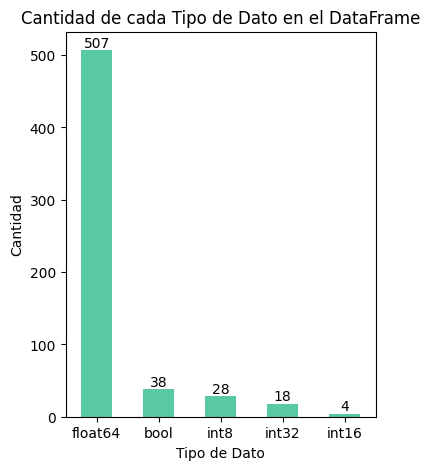

In [ ]:
data_types_counts = df.dtypes.value_counts()

plt.figure(figsize=(4, 5))
ax = data_types_counts.plot(kind='bar', rot=0, color='#59c9a5')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada Tipo de Dato en el DataFrame')
plt.show()


####  12. Revisión final luego de Data Preparation

##### 12.1 Cantidad de nulos

In [ ]:
print(f'Cantidad total de nulos -> {df.isna().sum().sum()}')

Cantidad total de nulos -> 0


#### 13. DataSet Limpio

In [ ]:
df.head()

Subsegmento  Region  Edad          Renta  Antiguedad  Internauta  \
0          160    13.0    43  663077.078726         130           1   
1          160    13.0    46  143640.000000          69           1   
2          170    13.0    45  929106.000000          24           1   
3          151    13.0    46  172447.000000         134           0   
4          170    13.0    46  805250.000000         116           0   

   Adicional  Ctacte  Consumo  Hipotecario  ...  IndRev_T10_R  IndRev_T10_T  \
0          1       1        0            0  ...          True         False   
1          0       1        0            1  ...          True         False   
2          1       1        0            1  ...         False          True   
3          1       0        0            0  ...          True         False   
4          1       1        0            1  ...         False          True   

   IndRev_T11_P  IndRev_T11_R  IndRev_T11_T  IndRev_T12_P  IndRev_T12_R  \
0         False          True         False         False          True   
1         False          True         False         False          True   
2         False          True         False         False         False   
3         False          True         False         False          True   
4         False         False          True         False         False   

   IndRev_T12_T  Sexo_Hombre  Sexo_Mujer  
0         False        False        True  
1         False         True       False  
2          True         True       False  
3         False         True       False  
4          True         True       False  

[5 rows x 595 columns]

## Fase 4: Modeling

### Regresión


Para nuestra predicción hemos definido la variable objecto **CUPO_L1**, para ello nos apoyaremos en las variables independientes Renta, Edad, Antigüedad

<Axes: >

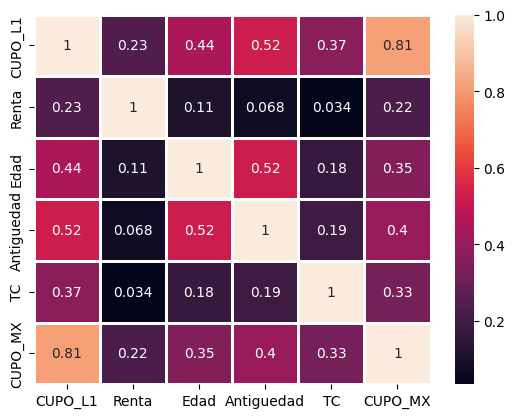

In [ ]:
# generar un df_regresion con las columnas CUPO_L1, Renta, Edad, Antiguedad
df_regresion = df[['CUPO_L1', 'Renta', 'Edad', 'Antiguedad','TC','CUPO_MX']]
corr = df_regresion.corr()
sns.heatmap(corr, annot=True, linewidths=.9)


#### Target seleccionado : CUPO_L1

### Separamos datos de entrenamiento y testeo

In [ ]:
from sklearn.model_selection import train_test_split


# separar el dataframe en train y test con un 80% para train y 20% para test y random_state=42 y stratify=df['CUPO_L1']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_regresion.drop(['CUPO_L1'], axis=1), df_regresion['CUPO_L1'], test_size=0.2, random_state=42)


### Modelos sin hiperparámetros

Realizaremos un entrenamiento previo sin hiperparámetros para tener una vista preliminar del posible mejor modelo, los modelos seleccionados serán:

- DecisionTreeRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- SVR
- KNeighborsRegressor
- SGDRegressor

In [ ]:
# importar todos los modelos de regresion de sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor




#### Modelos sin hiperparámetros

In [ ]:

# inicializar los modelos de regresion con los parametros por defecto


dtR = DecisionTreeRegressor()
rfR = RandomForestRegressor()
gbR = GradientBoostingRegressor()
svr = SVR()
knnR = KNeighborsRegressor()
sgdR = SGDRegressor()


### Entrenamiento de los modelos

In [ ]:
# entrenar los modelos de regresion con los datos de train

dtR.fit(X_train_reg, y_train_reg)
rfR.fit(X_train_reg, y_train_reg)
gbR.fit(X_train_reg, y_train_reg)
svr.fit(X_train_reg, y_train_reg)
knnR.fit(X_train_reg, y_train_reg)
sgdR.fit(X_train_reg, y_train_reg)


# generar una lista con todos los modelos de regresion
models = [dtR, rfR, gbR, svr, knnR, sgdR]



### Vista del R² y Raíz del error cuadrática medio

In [ ]:
# for que recorra la lista de modelos y que imprima el MAE, MSE y RMSE, R2 de cada modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
i = 1
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.0f}')
    print(f'El RMSE del modelo es {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.0f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100,'\n')
    i += 1

1° Modelo de Clasificación -> DecisionTreeRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 597966802670
El RMSE del modelo es 773283
El R² del modelo es 0.49

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 311502888546
El RMSE del modelo es 558124
El R² del modelo es 0.73

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingRegressor()

----------------------------------------------------------------------------------------------------
El MSE del modelo es 305093987012
El RMSE del modelo es 552353
El R² del modelo es 0.74

-------------------------------------------------------

### Entrenamiento de Modelos con hiperparámetros

#### GradientBoostingRegressor

##### GradientBoostingRegressor V1

In [ ]:
gbV1 = GradientBoostingRegressor( learning_rate=0.1, n_estimators=100, max_depth=3, tol=2, random_state=42)
gbV1.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(random_state=42, tol=2)

##### GradientBoostingRegressor V2

In [ ]:
gbV2 = GradientBoostingRegressor(
    learning_rate=0.1, n_estimators=500, max_depth=3, tol=2, random_state=42)
gbV2.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)

##### GradientBoostingRegressor V3

In [ ]:
gbV3 = GradientBoostingRegressor(
    learning_rate=0.1, n_estimators=100, max_depth=30, tol=2, random_state=42)
gbV3.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(max_depth=30, random_state=42, tol=2)

##### GradientBoostingRegressor V4

In [ ]:
gbV4 = GradientBoostingRegressor(learning_rate=0.4, n_estimators=3, max_depth=300, tol=1e-2, random_state=42)
gbV4.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(learning_rate=0.4, max_depth=300, n_estimators=3,
                          random_state=42, tol=0.01)

##### GradientBoostingRegressor V5

In [ ]:
gbV5 = GradientBoostingRegressor( learning_rate=0.4, n_estimators=1, max_depth=3000, tol=1e-2, random_state=42)
gbV5.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(learning_rate=0.4, max_depth=3000, n_estimators=1,
                          random_state=42, tol=0.01)

##### GradientBoostingRegressor V6

In [ ]:
gbV6 = GradientBoostingRegressor( learning_rate=0.1, n_estimators=100, max_depth=3000, tol=1e-2, random_state=42)
gbV6.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(max_depth=3000, random_state=42, tol=0.01)

##### Revisión de R² y RMSE de las 6 versiones de GradientBoostingRegressor 

In [ ]:
models = [gbV1, gbV2, gbV3, gbV4, gbV5, gbV6]
i = 1
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.0f}')
    print(f'El RMSE del modelo es {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.0f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100, '\n')
    i += 1

1° Modelo de Clasificación -> GradientBoostingRegressor(random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 305338363225
El RMSE del modelo es 552574
El R² del modelo es 0.74

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> GradientBoostingRegressor(n_estimators=500, random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 317532412246
El RMSE del modelo es 563500
El R² del modelo es 0.73

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingRegressor(max_depth=30, random_state=42, tol=2)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 551048746574
El R

#### DecisionTreeRegressor

In [ ]:
dtrV1 = DecisionTreeRegressor(
    min_samples_split=5, min_samples_leaf=5, random_state=42)

dtrV1.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=5, random_state=42)

#### RandomForestRegressor

##### RandomForestRegressor V1

In [ ]:
rfRV1 = RandomForestRegressor(min_samples_split=5, min_samples_leaf=5, random_state=42,
                           bootstrap=True, max_samples=0.8, n_estimators=3, max_depth=40)

rfRV1.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=3, random_state=42)

##### RandomForestRegressor V2

In [ ]:
rfRV2 = RandomForestRegressor(min_samples_split=20, min_samples_leaf=20, random_state=42,
                           bootstrap=True, max_samples=0.8, n_estimators=12, max_depth=40)

rfRV2.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=12, random_state=42)

#### KNeighborsRegressor

In [ ]:
knnRV1 = KNeighborsRegressor(
    n_neighbors=2000, weights='distance', algorithm='auto', leaf_size=40, p=2)

knnRV1.fit(X_train_reg, y_train_reg)

KNeighborsRegressor(leaf_size=40, n_neighbors=2000, weights='distance')

#### SGDRegressor

##### SGDRegressor V1

In [ ]:
sgdRV1 = SGDRegressor(max_iter=1200000, tol=1e-4, penalty=None,
                      eta0=0.8, n_iter_no_change=1000, random_state=42)

sgdRV1.fit(X_train_reg, y_train_reg)

SGDRegressor(eta0=0.8, max_iter=1200000, n_iter_no_change=1000, penalty=None,
             random_state=42, tol=0.0001)

##### SGDRegressor V2

In [ ]:
sgdRV2 = SGDRegressor(max_iter=1200000, tol=1e-3, penalty=None,
                      eta0=0.9, n_iter_no_change=150, random_state=42)

sgdRV2.fit(X_train_reg, y_train_reg)

SGDRegressor(eta0=0.9, max_iter=1200000, n_iter_no_change=150, penalty=None,
             random_state=42)

##### SGDRegressor V3

In [ ]:
sgdRV3 = SGDRegressor(max_iter=1200000, tol=1e-3, penalty=None,
                      eta0=0.0000001, n_iter_no_change=200, random_state=42)

sgdRV3.fit(X_train_reg, y_train_reg)


SGDRegressor(eta0=1e-07, max_iter=1200000, n_iter_no_change=200, penalty=None,
             random_state=42)

In [ ]:

# generar una lista con todos los modelos de regresion
models = [dtrV1, rfRV1, rfRV2, knnRV1, sgdRV1, sgdRV2, sgdRV3]

i=1
# for que recorra la lista de modelos y que imprima el RMSE, R2 de cada modelo
for model in models:
    y_pred_reg = model.predict(X_test_reg)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El MSE del modelo es {mean_squared_error(y_test_reg, y_pred_reg):.0f}')
    print(
        f'El RMSE del modelo es $ {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.0f}')
    print(f'El R² del modelo es {r2_score(y_test_reg, y_pred_reg):.2f}\n')
    print('-'*100,'\n')
    i = i + 1


1° Modelo de Clasificación -> DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=5, random_state=42)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 393757523508
El RMSE del modelo es $ 627501
El R² del modelo es 0.66

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=3, random_state=42)

----------------------------------------------------------------------------------------------------
El MSE del modelo es 318265445363
El RMSE del modelo es $ 564150
El R² del modelo es 0.73

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> RandomForestRegressor(max_depth=40, max_samples=0.8, min_samples_leaf=20,
               

###  Decisión

El algoritmo utilizado,será el __RandomForestRegressor__ con los hiperparametros _max_depth=40, max_samples=0.8, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=12, random_state=42_ ya es el que nos da menor MSE y RMSE, aunque sea un valor alto de delta de Cupo unos ___$ 564.150___ es el menor de todos los algoritmos entrenados, además es el que mejor R² nos da con un 76% de acierto

### Clasificación

#### Target seleccionado : Sexo_Hombre


Para nuestra predicción hemos definido la variable objecto **SEXO_HOMBRE**, para ello nos apoyaremos en las variables independientes Renta, Edad, Antigüedad, TC

<Axes: >

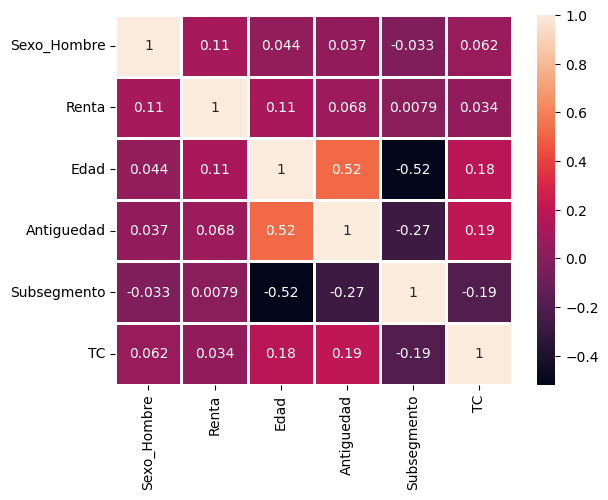

In [ ]:
df_clas = df[['Sexo_Hombre', 'Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'TC']]
corr = df_clas.corr()
sns.heatmap(corr, annot=True, linewidths=.9)


Importe de librerías 

In [ ]:
# importar todos los modelos de clasificacion de sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Separamos datos de entrenamiento y testeo

In [ ]:
# separar train y test de def_clas con un 80% para train y 20% para test y random_state=42
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    df_clas.drop(['Sexo_Hombre'], axis=1), df_clas['Sexo_Hombre'], test_size=0.2, random_state=42)


### Modelos sin hiperparámetros

Realizaremos un entrenamiento previo sin hiperparámetros para tener una vista preliminar del posible mejor modelo, los modelos seleccionados serán:

- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- KNeighborsClassifier


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clas, y_train_clas)

DecisionTreeClassifier()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_clas, y_train_clas)


RandomForestClassifier()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_clas, y_train_clas)


GradientBoostingClassifier()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_clas, y_train_clas)


KNeighborsClassifier()

### Entrenamiento de Modelos con hiperparámetros

#### DecisionTreeClassifier

##### DecisionTreeClassifier V1

In [ ]:
dt_1 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
dt_1.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

##### DecisionTreeClassifier V2

In [ ]:
dt_2 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='gini')
dt_2.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(max_depth=2, random_state=42)

##### DecisionTreeClassifier V3

In [ ]:
dt_3 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='log_loss')
dt_3.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)

##### DecisionTreeClassifier V4

In [ ]:
dt_4 = DecisionTreeClassifier(
    max_depth=2, random_state=42, criterion='gini', min_samples_leaf=10)
dt_4.fit(X_train_clas, y_train_clas)


DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

#### RandomForestClassifier 

##### RandomForestClassifier V1

In [ ]:
rf_1 = RandomForestClassifier(max_depth=2, random_state=42)
rf_1.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=2, random_state=42)

##### RandomForestClassifier V2

In [ ]:
rf_2 = RandomForestClassifier(max_depth=3, random_state=42)
rf_2.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=3, random_state=42)

##### RandomForestClassifier V3

In [ ]:
rf_3 = RandomForestClassifier(max_depth=15, random_state=42)
rf_3.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=15, random_state=42)

##### RandomForestClassifier V4

In [ ]:
rf_4 = RandomForestClassifier(max_depth=3, random_state=42,
                              min_samples_leaf=10, n_estimators=1000)
rf_4.fit(X_train_clas, y_train_clas)


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

##### RandomForestClassifier V5

In [ ]:
rf_5 = RandomForestClassifier(max_depth=3, random_state=42,
                              min_samples_leaf=10, n_estimators=1000, max_features='sqrt')
rf_5.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

##### RandomForestClassifier V6

In [ ]:
rf_6 = RandomForestClassifier(max_depth=3, random_state=42, min_samples_leaf=10,
                              n_estimators=1000, max_features='log2', max_samples=0.8)
rf_6.fit(X_train_clas, y_train_clas)

RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)

#### GradientBoostingClassifier

##### GradientBoostingClassifier V1

In [ ]:
gb_1 = GradientBoostingClassifier(max_depth=2, random_state=42)
gb_1.fit(X_train_clas, y_train_clas)


GradientBoostingClassifier(max_depth=2, random_state=42)

##### GradientBoostingClassifier V2

In [ ]:
gb_2 = GradientBoostingClassifier(loss='exponential' ,learning_rate=0.1, n_estimators=150, max_depth=3, random_state=42)
gb_2.fit(X_train_clas, y_train_clas)

GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)

##### GradientBoostingClassifier V3

In [ ]:
gb_3 = GradientBoostingClassifier(
    learning_rate=0.001, n_estimators=1500, max_depth=3, random_state=42, min_samples_leaf=10)
gb_3.fit(X_train_clas, y_train_clas)

GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)

##### GradientBoostingClassifier V4

In [ ]:
gb_4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1500, max_depth=3, random_state=42, min_samples_leaf=10)
gb_4.fit(X_train_clas, y_train_clas)

GradientBoostingClassifier(min_samples_leaf=10, n_estimators=1500,
                           random_state=42)

#### KNeighborsClassifier

##### KNeighborsClassifier V1

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=2)
knn_1.fit(X_train_clas, y_train_clas)


KNeighborsClassifier(n_neighbors=2)

##### KNeighborsClassifier V2

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=500, algorithm='ball_tree', )
knn_2.fit(X_train_clas, y_train_clas)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=500)

##### KNeighborsClassifier V3

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=500, weights='distance', leaf_size=60, p=3)
knn_3.fit(X_train_clas, y_train_clas)

KNeighborsClassifier(leaf_size=60, n_neighbors=500, p=3, weights='distance')

##### KNeighborsClassifier V4

In [ ]:
knn_4 = KNeighborsClassifier(
    n_neighbors=5000, weights='distance', algorithm='auto', leaf_size=1000, p=1)
knn_4.fit(X_train_clas, y_train_clas)

KNeighborsClassifier(leaf_size=1000, n_neighbors=5000, p=1, weights='distance')

Se genera una lista con los modelos

In [ ]:
models = [  dt, rf, gb, knn, 
            dt_1, dt_2, dt_3, dt_4, 
            rf_1, rf_2, rf_3, rf_4, rf_5, rf_6,
            gb_1, gb_2, gb_3, gb_4,
            knn_1, knn_2, knn_3, knn_4]


### Vista del Matriz de confusión y suma de aciertos

1° Modelo de Clasificación -> DecisionTreeClassifier()



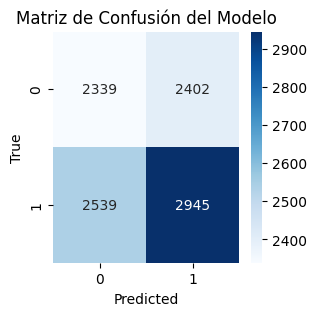

Suma de la diagonal de la matriz de confusión del modelo es: 5284

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestClassifier()



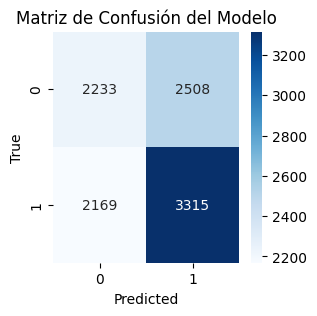

Suma de la diagonal de la matriz de confusión del modelo es: 5548

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()



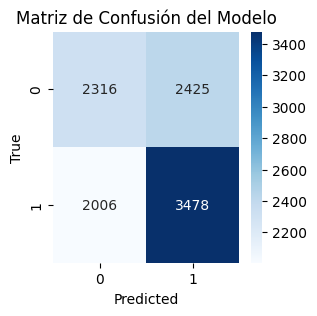

Suma de la diagonal de la matriz de confusión del modelo es: 5794

---------------------------------------------------------------------------------------------------- 

4° Modelo de Clasificación -> KNeighborsClassifier()



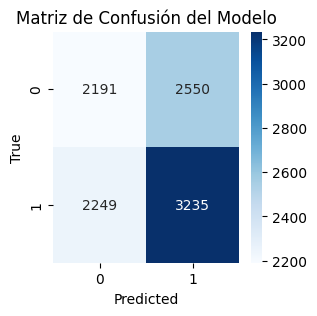

Suma de la diagonal de la matriz de confusión del modelo es: 5426

---------------------------------------------------------------------------------------------------- 

5° Modelo de Clasificación -> DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)



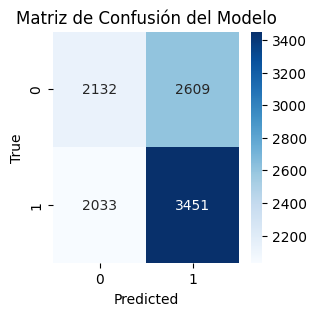

Suma de la diagonal de la matriz de confusión del modelo es: 5583

---------------------------------------------------------------------------------------------------- 

6° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, random_state=42)



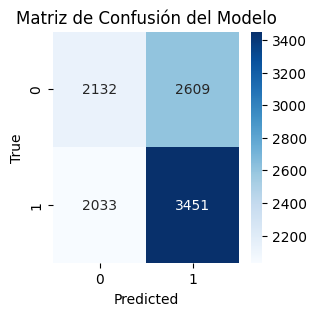

Suma de la diagonal de la matriz de confusión del modelo es: 5583

---------------------------------------------------------------------------------------------------- 

7° Modelo de Clasificación -> DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)



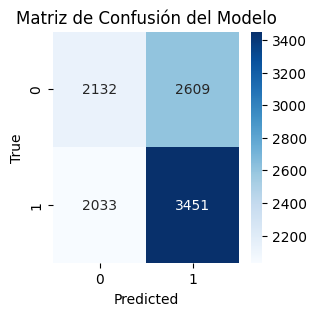

Suma de la diagonal de la matriz de confusión del modelo es: 5583

---------------------------------------------------------------------------------------------------- 

8° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)



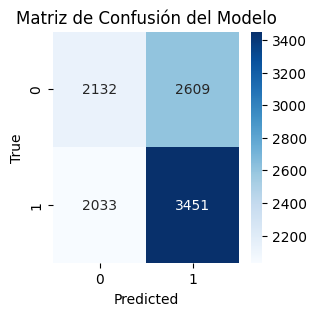

Suma de la diagonal de la matriz de confusión del modelo es: 5583

---------------------------------------------------------------------------------------------------- 

9° Modelo de Clasificación -> RandomForestClassifier(max_depth=2, random_state=42)



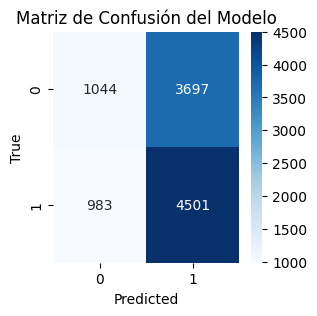

Suma de la diagonal de la matriz de confusión del modelo es: 5545

---------------------------------------------------------------------------------------------------- 

10° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, random_state=42)



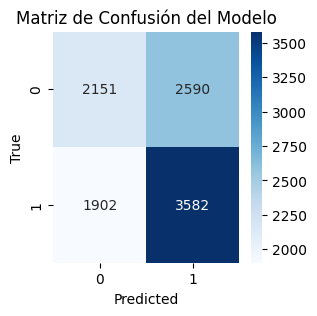

Suma de la diagonal de la matriz de confusión del modelo es: 5733

---------------------------------------------------------------------------------------------------- 

11° Modelo de Clasificación -> RandomForestClassifier(max_depth=15, random_state=42)



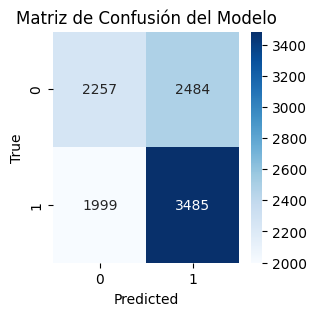

Suma de la diagonal de la matriz de confusión del modelo es: 5742

---------------------------------------------------------------------------------------------------- 

12° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)



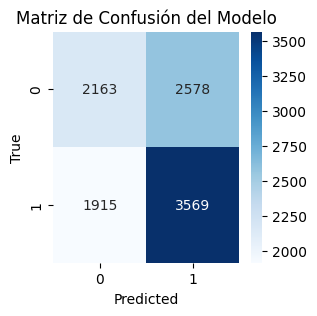

Suma de la diagonal de la matriz de confusión del modelo es: 5732

---------------------------------------------------------------------------------------------------- 

13° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)



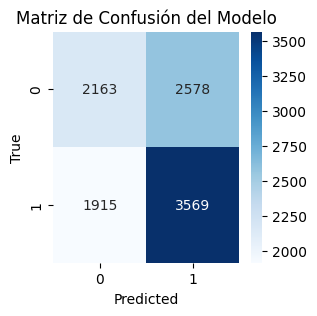

Suma de la diagonal de la matriz de confusión del modelo es: 5732

---------------------------------------------------------------------------------------------------- 

14° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)



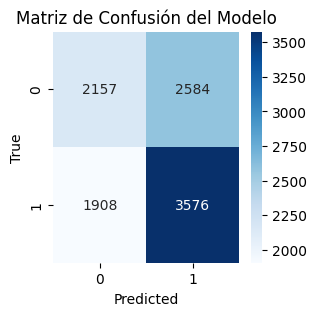

Suma de la diagonal de la matriz de confusión del modelo es: 5733

---------------------------------------------------------------------------------------------------- 

15° Modelo de Clasificación -> GradientBoostingClassifier(max_depth=2, random_state=42)



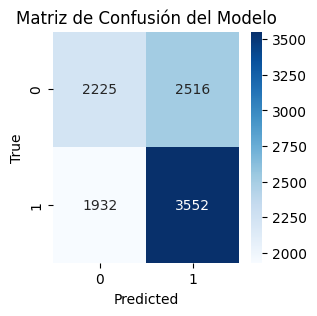

Suma de la diagonal de la matriz de confusión del modelo es: 5777

---------------------------------------------------------------------------------------------------- 

16° Modelo de Clasificación -> GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)



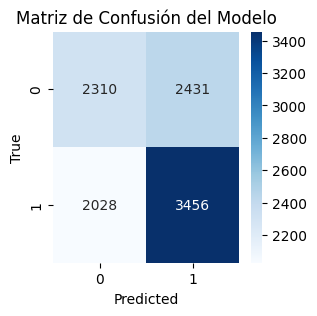

Suma de la diagonal de la matriz de confusión del modelo es: 5766

---------------------------------------------------------------------------------------------------- 

17° Modelo de Clasificación -> GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)



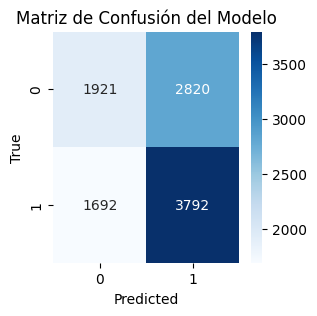

Suma de la diagonal de la matriz de confusión del modelo es: 5713

---------------------------------------------------------------------------------------------------- 

18° Modelo de Clasificación -> GradientBoostingClassifier(min_samples_leaf=10, n_estimators=1500,
                           random_state=42)



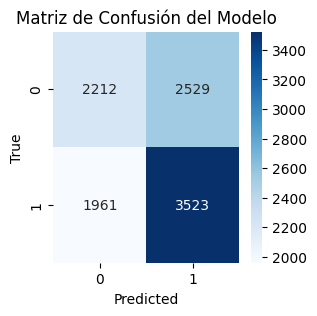

Suma de la diagonal de la matriz de confusión del modelo es: 5735

---------------------------------------------------------------------------------------------------- 

19° Modelo de Clasificación -> KNeighborsClassifier(n_neighbors=2)



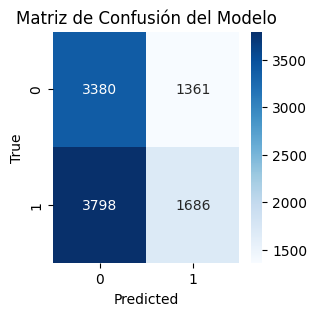

Suma de la diagonal de la matriz de confusión del modelo es: 5066

---------------------------------------------------------------------------------------------------- 

20° Modelo de Clasificación -> KNeighborsClassifier(algorithm='ball_tree', n_neighbors=500)



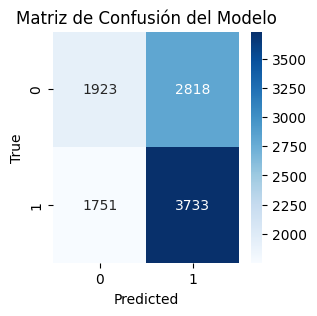

Suma de la diagonal de la matriz de confusión del modelo es: 5656

---------------------------------------------------------------------------------------------------- 

21° Modelo de Clasificación -> KNeighborsClassifier(leaf_size=60, n_neighbors=500, p=3, weights='distance')



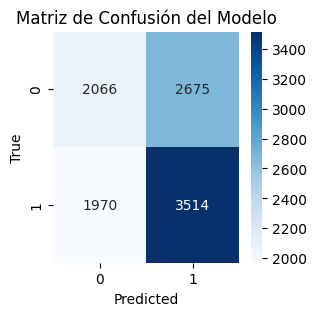

Suma de la diagonal de la matriz de confusión del modelo es: 5580

---------------------------------------------------------------------------------------------------- 

22° Modelo de Clasificación -> KNeighborsClassifier(leaf_size=1000, n_neighbors=5000, p=1, weights='distance')



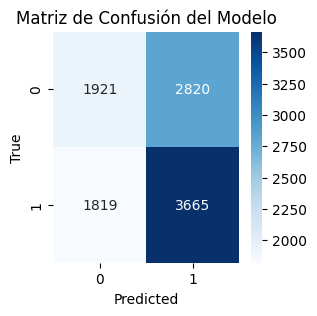

Suma de la diagonal de la matriz de confusión del modelo es: 5586

---------------------------------------------------------------------------------------------------- 



In [ ]:
# matriz de confusion para cada modelo de clasificacion
from sklearn.metrics import confusion_matrix, classification_report
i=1
for model in models:

    y_pred_clas = model.predict(X_test_clas)
    cm = confusion_matrix(y_test_clas, y_pred_clas)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    # grafico de matriz de confusion con la diagonal en un color distinto
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Matriz de Confusión del Modelo')
    plt.show()
    
    print(
        f'Suma de la diagonal de la matriz de confusión del modelo es: {cm.trace()}\n')
    print('-'*100,'\n')

    i += 1

### Analisis de accuracy, sensibilidad, precisión y F1

In [ ]:
# for que recorra la lista de modelos y que imprima el accuracy, precision, recall, f1-score de cada modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
i = 1
for model in models:
    y_pred_clas = model.predict(X_test_clas)
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(f'El accuracy del modelo es {accuracy_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El precision del modelo es {precision_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El recall del modelo es {recall_score(y_test_clas, y_pred_clas):.2f}')
    print(f'El f1-score del modelo es {f1_score(y_test_clas, y_pred_clas):.2f}\n')
    print('-'*100,'\n')
    i += 1

    

1° Modelo de Clasificación -> DecisionTreeClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.52
El precision del modelo es 0.55
El recall del modelo es 0.54
El f1-score del modelo es 0.54

---------------------------------------------------------------------------------------------------- 

2° Modelo de Clasificación -> RandomForestClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.54
El precision del modelo es 0.57
El recall del modelo es 0.60
El f1-score del modelo es 0.59

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()

----------------------------------------------------------------------------------------------------
El accuracy del modelo es 0.57
El precision del modelo es 0.59
El recal

### Gráficos de la curva curva ROC/AUC

In [ ]:
import  matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
def plot_roc_chart(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(3, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs


### Gráfico y comparación

1° Modelo de Clasificación -> DecisionTreeClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.52 vs 0.52 de accuracy
generando una diferencia de -0.00



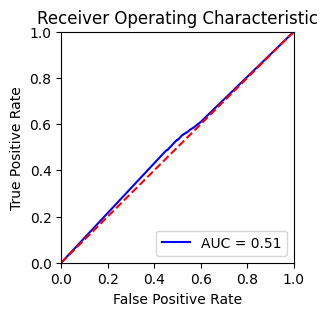

---------------------------------------------------------------------------------------------------- 



2° Modelo de Clasificación -> RandomForestClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.54 de accuracy
generando una diferencia de -0.00



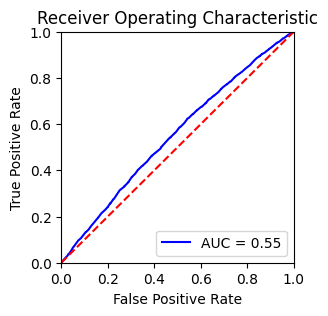

---------------------------------------------------------------------------------------------------- 

3° Modelo de Clasificación -> GradientBoostingClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.56 vs 0.57 de accuracy
generando una diferencia de -0.01



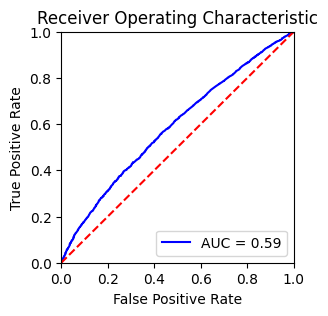

---------------------------------------------------------------------------------------------------- 

4° Modelo de Clasificación -> KNeighborsClassifier()

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.53 vs 0.53 de accuracy
generando una diferencia de -0.00



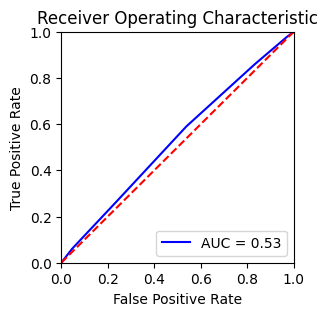

---------------------------------------------------------------------------------------------------- 

5° Modelo de Clasificación -> DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



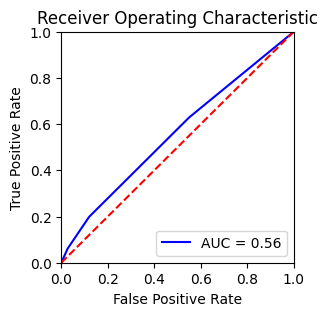

---------------------------------------------------------------------------------------------------- 

6° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



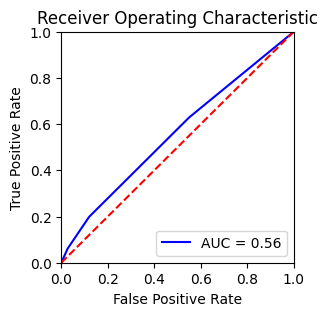

---------------------------------------------------------------------------------------------------- 

7° Modelo de Clasificación -> DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



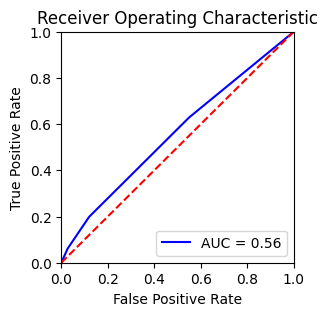

---------------------------------------------------------------------------------------------------- 

8° Modelo de Clasificación -> DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



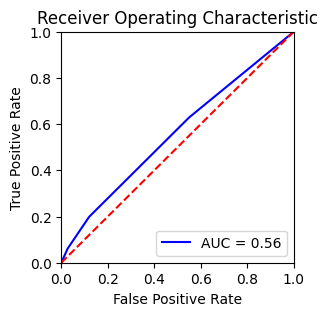

---------------------------------------------------------------------------------------------------- 

9° Modelo de Clasificación -> RandomForestClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.52 vs 0.54 de accuracy
generando una diferencia de -0.02



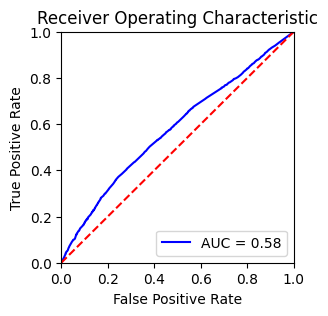

---------------------------------------------------------------------------------------------------- 

10° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



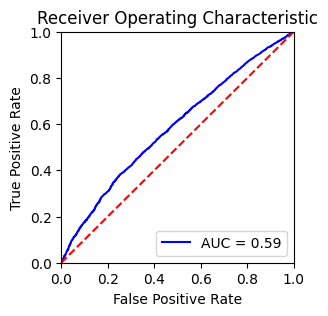

---------------------------------------------------------------------------------------------------- 

11° Modelo de Clasificación -> RandomForestClassifier(max_depth=15, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.56 vs 0.56 de accuracy
generando una diferencia de -0.01



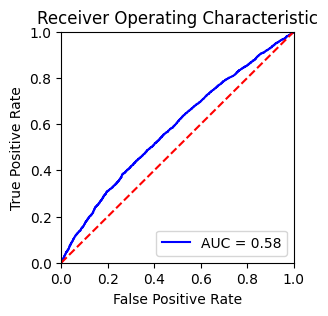

---------------------------------------------------------------------------------------------------- 

12° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



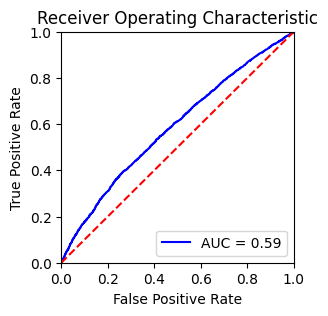

---------------------------------------------------------------------------------------------------- 

13° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



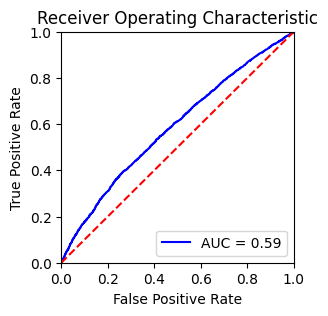

---------------------------------------------------------------------------------------------------- 

14° Modelo de Clasificación -> RandomForestClassifier(max_depth=3, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, n_estimators=1000, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



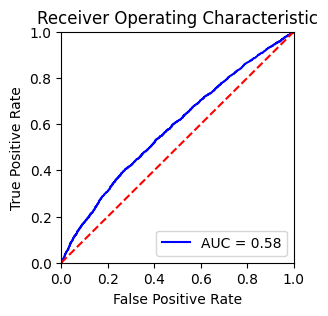

---------------------------------------------------------------------------------------------------- 

15° Modelo de Clasificación -> GradientBoostingClassifier(max_depth=2, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.56 vs 0.56 de accuracy
generando una diferencia de -0.01



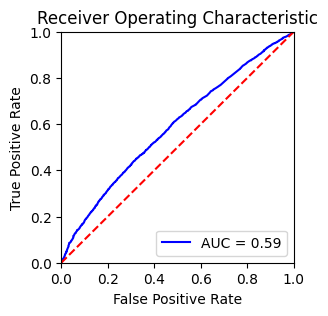

---------------------------------------------------------------------------------------------------- 

16° Modelo de Clasificación -> GradientBoostingClassifier(loss='exponential', n_estimators=150,
                           random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.56 vs 0.56 de accuracy
generando una diferencia de -0.01



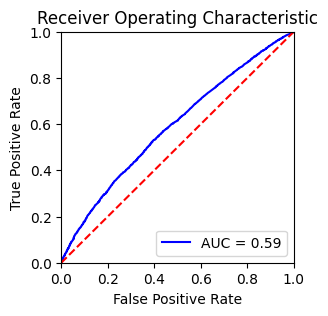

---------------------------------------------------------------------------------------------------- 

17° Modelo de Clasificación -> GradientBoostingClassifier(learning_rate=0.001, min_samples_leaf=10,
                           n_estimators=1500, random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



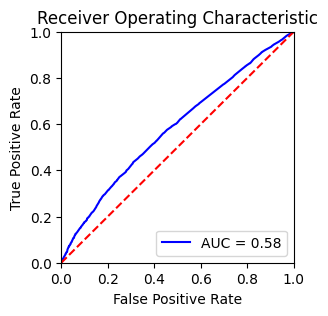

---------------------------------------------------------------------------------------------------- 

18° Modelo de Clasificación -> GradientBoostingClassifier(min_samples_leaf=10, n_estimators=1500,
                           random_state=42)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.55 vs 0.56 de accuracy
generando una diferencia de -0.01



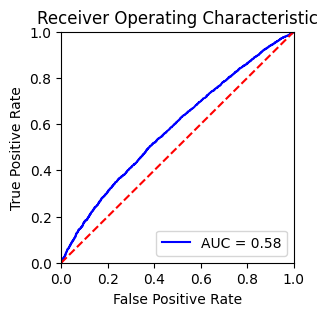

---------------------------------------------------------------------------------------------------- 

19° Modelo de Clasificación -> KNeighborsClassifier(n_neighbors=2)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.51 vs 0.50 de accuracy
generando una diferencia de 0.01



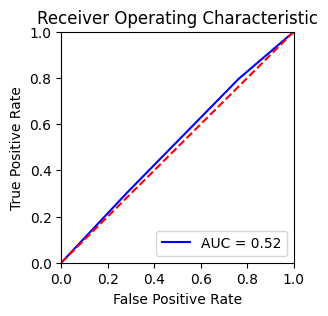

---------------------------------------------------------------------------------------------------- 

20° Modelo de Clasificación -> KNeighborsClassifier(algorithm='ball_tree', n_neighbors=500)

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



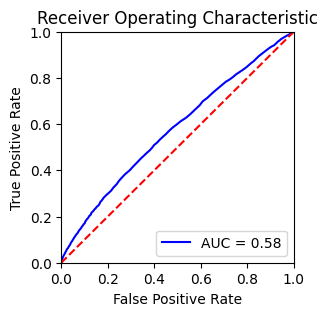

---------------------------------------------------------------------------------------------------- 

21° Modelo de Clasificación -> KNeighborsClassifier(leaf_size=60, n_neighbors=500, p=3, weights='distance')

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



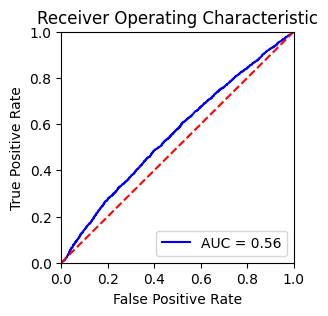

---------------------------------------------------------------------------------------------------- 

22° Modelo de Clasificación -> KNeighborsClassifier(leaf_size=1000, n_neighbors=5000, p=1, weights='distance')

----------------------------------------------------------------------------------------------------
El área bajo la curva ROC del modelo es 0.54 vs 0.55 de accuracy
generando una diferencia de -0.01



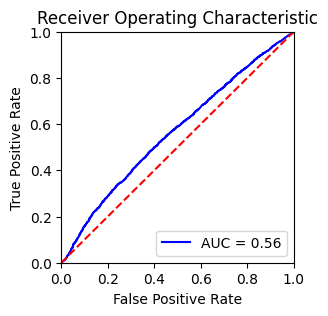

---------------------------------------------------------------------------------------------------- 



In [ ]:
# trazar la curva ROC/AUC para cada modelo de clasificacion comparando con las clasificaciones

from sklearn.metrics import roc_curve, auc
i = 1
for model in models:
    y_pred_clas = model.predict(X_test_clas)
    fpr, tpr, thresholds = roc_curve(y_test_clas, y_pred_clas)
    roc_auc = auc(fpr, tpr)
    accuaracy = accuracy_score(y_test_clas, y_pred_clas)
    dif = roc_auc - accuaracy
    print(f'{i}° Modelo de Clasificación -> {model}\n')
    print('-'*100)
    print(
        f'El área bajo la curva ROC del modelo es {roc_auc:.2f} vs {accuaracy:.2f} de accuracy')
    print(f'generando una diferencia de {dif:.2f}\n')
    plot_roc_chart(model, X_test_clas, y_test_clas)
    print('-'*100,'\n')
    i += 1


### Características más importantes

In [ ]:
## Identifica las características más importantes del dataset usando RandomForest

for score, name in zip(rf_1.feature_importances_, X_train_clas.columns):
    print(f'La característica {name} tiene un score de {score:.2f}')


La característica Renta tiene un score de 0.55
La característica Edad tiene un score de 0.12
La característica Antiguedad tiene un score de 0.02
La característica Subsegmento tiene un score de 0.16
La característica TC tiene un score de 0.16


### Decisión

El algoritmo utilizado,será el modelo N° 9 __RandomForestClassifier__ con los hiperparámetros _max_depth=2, random_state=42_ ya es el que mejor predice los Verdaderos negativos con 5.545, dando asi un recall de **82%**, ya que es el único valor que sobresale del resto puesto que los accuracy rondan el 50% y 57%

### Balanceo de Sexo_Hombre

#### Uso de SMOTE

In [ ]:
# realizar SMOTE para la variable Sexo_Hombre
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_clas_sm, y_train_clas_sm = sm.fit_resample(X_train_clas, y_train_clas)
df_clas_sm = pd.concat([X_train_clas_sm, y_train_clas_sm], axis=1)
df_clas_sm['Sexo_Hombre'].value_counts()

Sexo_Hombre
False    21927
True     21927
Name: count, dtype: int64

#### Matriz de confusión y Acurracy, Precision, Recall, F1-score balanceados

La matriz de confusión del modelo es:
 [[2626 2115]
 [2453 3031]]


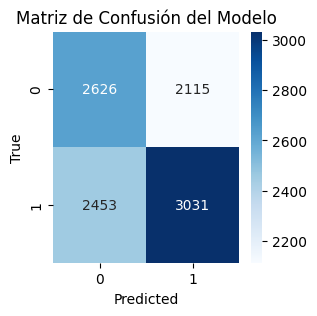

El accuracy del modelo es 0.55
El precision del modelo es 0.59
El recall del modelo es 0.55
El f1-score del modelo es 0.57



In [ ]:
# entrenar los modelos de clasificacion con los datos de train con SMOTE
rfc_balanced=RandomForestClassifier(max_depth=2, random_state=42)
rfc_balanced.fit(X_train_clas_sm, y_train_clas_sm)

# matriz de confusion para cada modelo de clasificacion con SMOTE
y_pred_clas = rfc_balanced.predict(X_test_clas)
cm = confusion_matrix(y_test_clas, y_pred_clas)
print(f'La matriz de confusión del modelo es:\n {cm}')
# grafico de matriz de confusion con la diagonal en un color distinto
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión del Modelo')
plt.show()

# acurracy, precision, recall, f1-score para cada modelo de clasificacion con SMOTE

print(f'El accuracy del modelo es {accuracy_score(y_test_clas, y_pred_clas):.2f}')
print(f'El precision del modelo es {precision_score(y_test_clas, y_pred_clas):.2f}')
print(f'El recall del modelo es {recall_score(y_test_clas, y_pred_clas):.2f}')
print(f'El f1-score del modelo es {f1_score(y_test_clas, y_pred_clas):.2f}\n')


### Características más importantes después del balanceo

In [ ]:
## Identifica las características más importantes del dataset usando RandomForest

for score, name in zip(rf_1.feature_importances_, X_train_clas_sm.columns):
    print(f'La característica {name} tiene un score de {score:.2f}')


La característica Renta tiene un score de 0.55
La característica Edad tiene un score de 0.12
La característica Antiguedad tiene un score de 0.02
La característica Subsegmento tiene un score de 0.16
La característica TC tiene un score de 0.16


### Decisión final

Debido a que al momento de balancear el modelo este empeora, hemos decido no usar el balanceo además la cantidad a balancear es ínfima son 3698 usuarios

In [ ]:
csv = "nota2.csv"
df.to_csv(csv, index=False)

# Nota 3 

### Casos de uso para aprendizaje no supervisado

#### Clasificación por Tipo de Cliente

1. Clasificación por tipo de Cliente: Un ejemplo de clusterización sería:
- Cluster 1: Silver (Clientes con características asociadas a un nivel básico).
- Cluster 2: Gold (Clientes con un historial financiero sólido y mayor capacidad de crédito).
- Cluster 3: Platinum (Clientes de alto valor con múltiples productos financieros).
- Cluster 4: Black (Clientes VIP con características exclusivas y alto poder adquisitivo).

Para esto usaremos las columnas 'Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'CUPO_L1','TC','CUPO_MX' 

2. Clasificación por Perfil de Uso:

- Cluster 1: Clientes con alto uso de tarjeta de crédito en compras nacionales e internacionales.
- Cluster 2: Clientes con bajo uso de tarjeta de crédito.
- Cluster 3: Clientes con uso significativo de avances en efectivo.

Para esto usaremos las columnas 'CUPO_L1','TC','CUPO_MX'

3. Clasificación Demográfica:

- Cluster 1: Clientes jóvenes con una sola tarjeta de crédito.
- Cluster 2: Clientes mayores con múltiples tarjetas de crédito.
- Cluster 3: Clientes con tarjetas de crédito y préstamos hipotecarios.

Para esto usaremos las columnas 'Renta', 'Edad', 'Hipotecario'

### Clusterización

Ya que nuestro caso de uso elegido es el Clasificación por Tipo de Cliente, tenemos como hipótesis usar aproximadamente 4-6 clusters usaremos un rango de 2 a 11, para cumplir con los 10 k's distintos solicitados

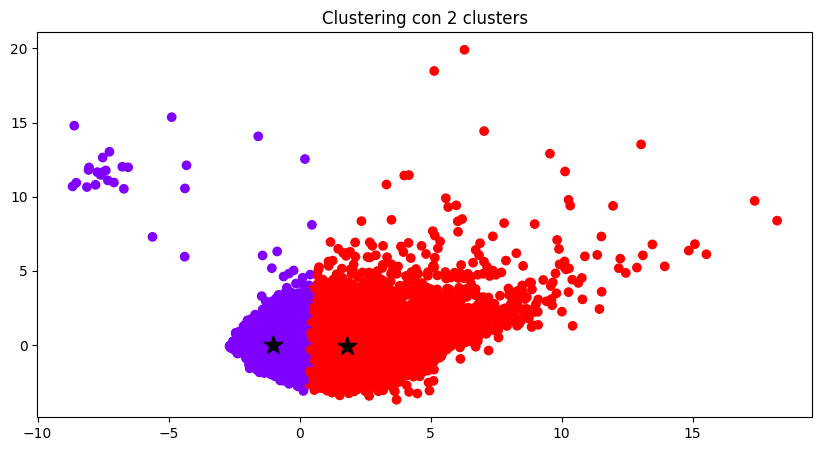

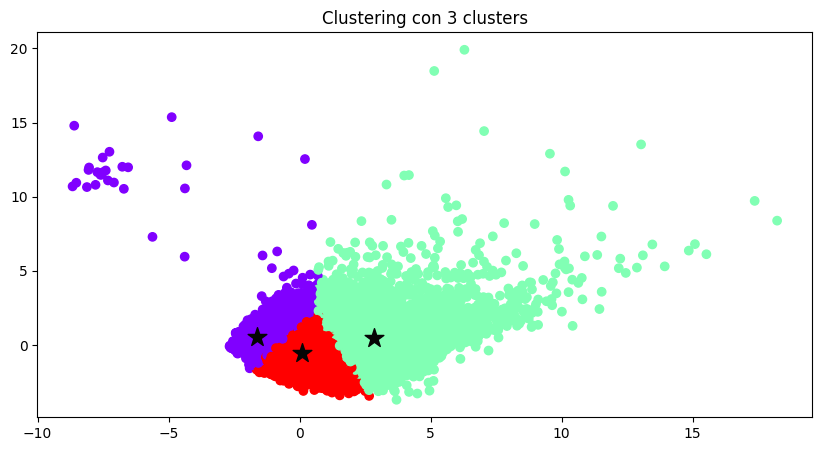

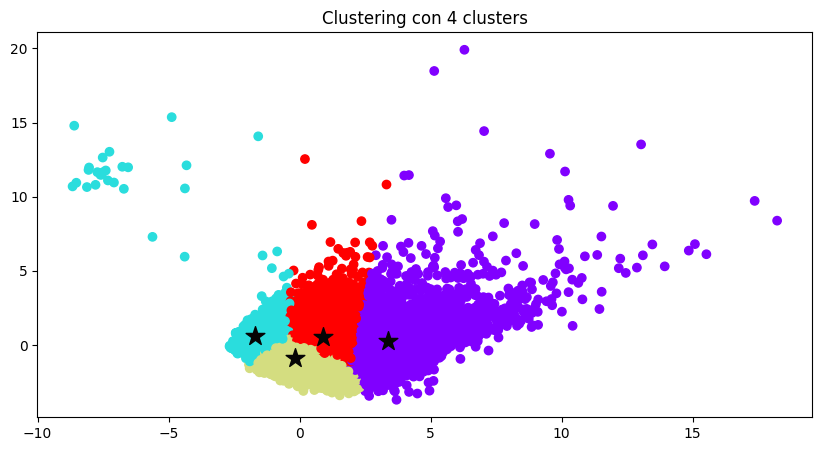

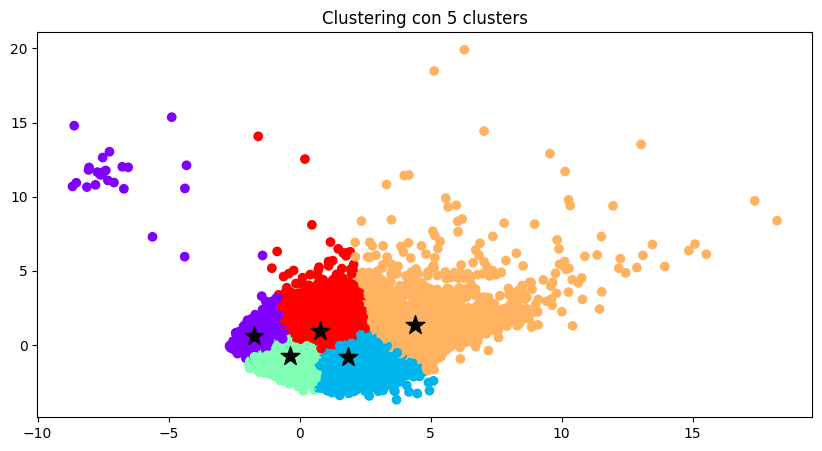

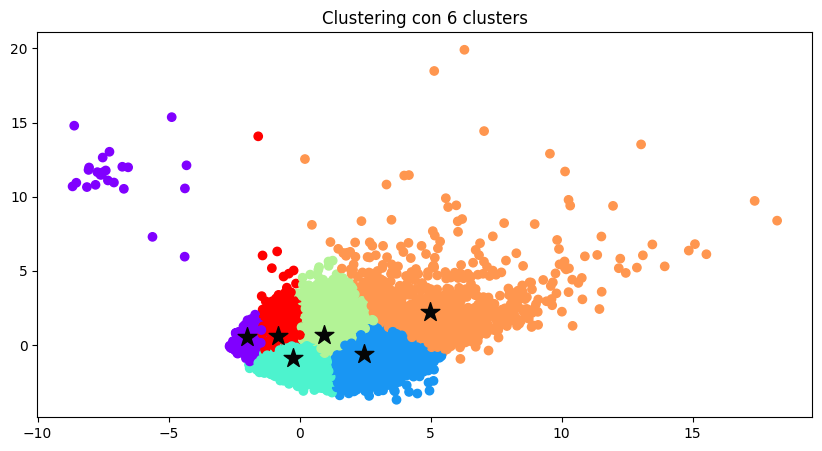

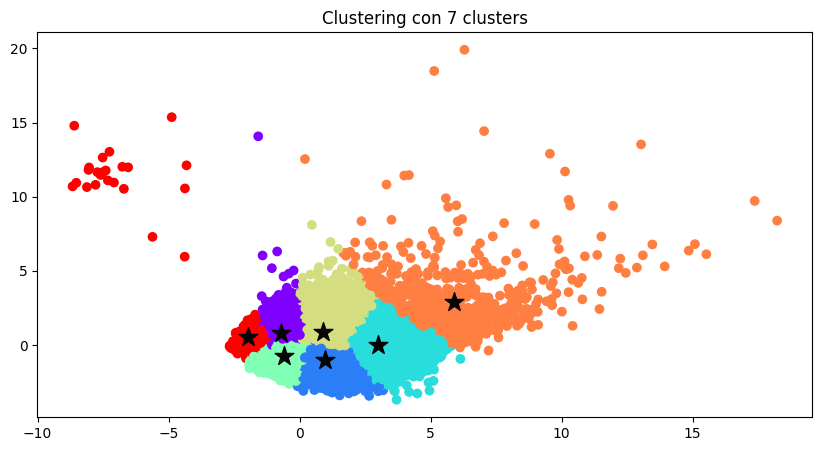

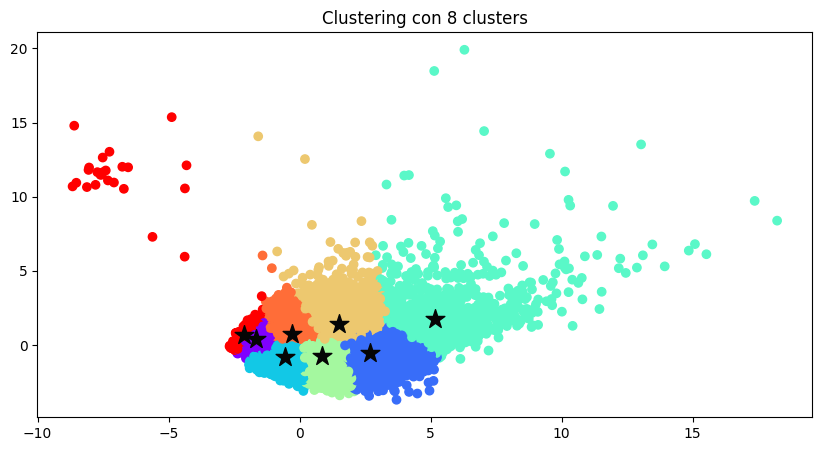

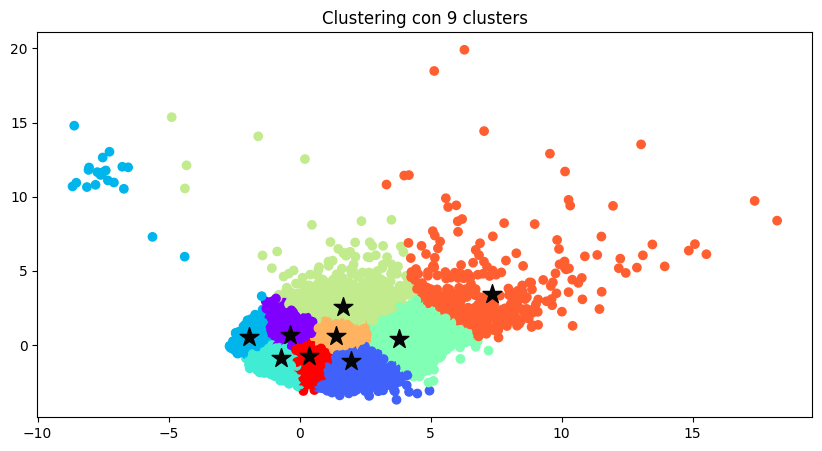

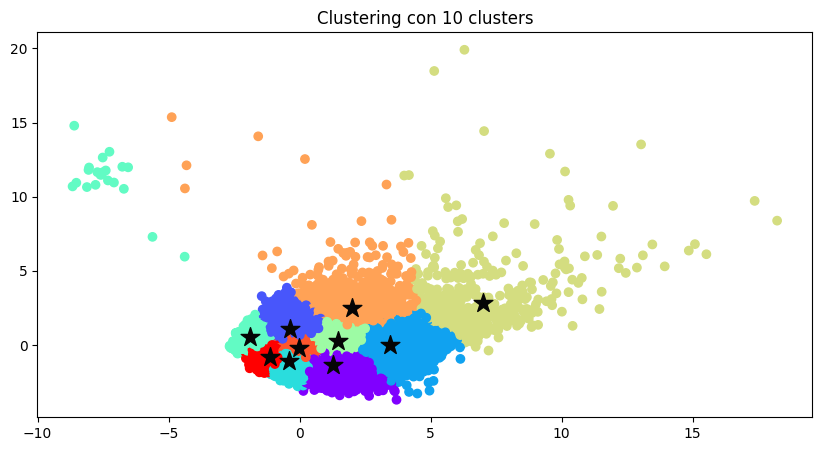

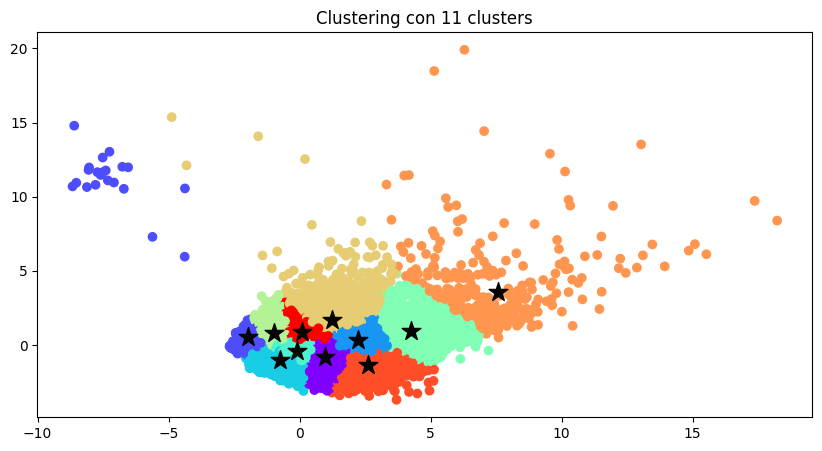

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Rango de clusters a probar
k_range = np.arange(2, 12)

# crear un df_clustering usando el df con las columnas 'Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'CUPO_L1', 'TC','CUPO_MX' 
df_clustering_complete = df[['Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'CUPO_L1', 'TC','CUPO_MX']]

# Normalizar el df_clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering = scaler.fit_transform(df_clustering_complete)


# Reducir la dimensionalidad del df_clustering a 2 dimensiones usando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_clustering = pca.fit_transform(df_clustering)





# realizar el clustering con MiniBatchKMeans
inertia = []
silhouette = []
for k in k_range:
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42, n_init=10)
    mbk.fit(df_clustering)
    inertia.append(mbk.inertia_)
    silhouette.append(silhouette_score(df_clustering, mbk.labels_))
    # grafiar la clusterizacion con el valor de k y el valor de rand separando los clusters por colores y mostrando el centroide de cada cluster, separando las clusters por colores y con lineas
    plt.figure(figsize=(10, 5))
    plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=mbk.labels_, cmap='rainbow')
    plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], marker='*', s=200, c='#050505')
    plt.title(f'Clustering con {k} clusters')
    plt.show()




#### Utilización del metodo del codo

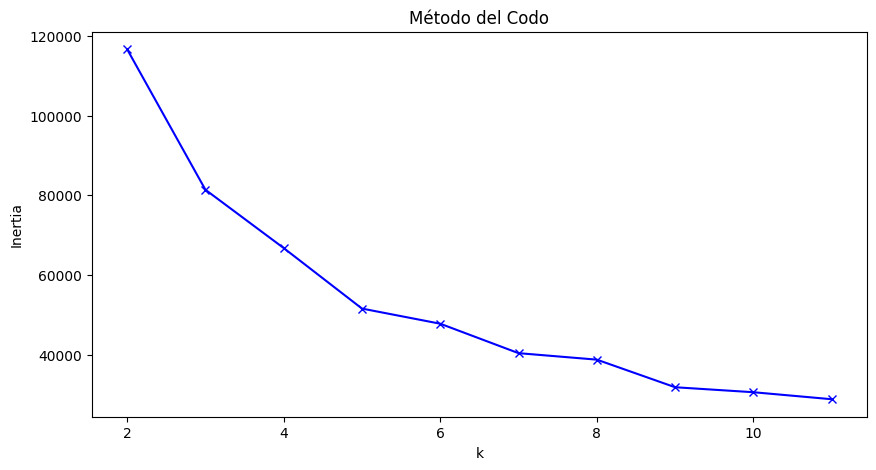

In [ ]:
# relizar el metodo del codo para encontrar el numero de clusters optimo

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()



Utilizando la definición dada se escogerá visualmente aquel valor para el cual la caída en la suma total es marginal, hemos decidido el numero k=5 como codo

#### Comprobación de k optimo

Se utilizará el método de la silueta

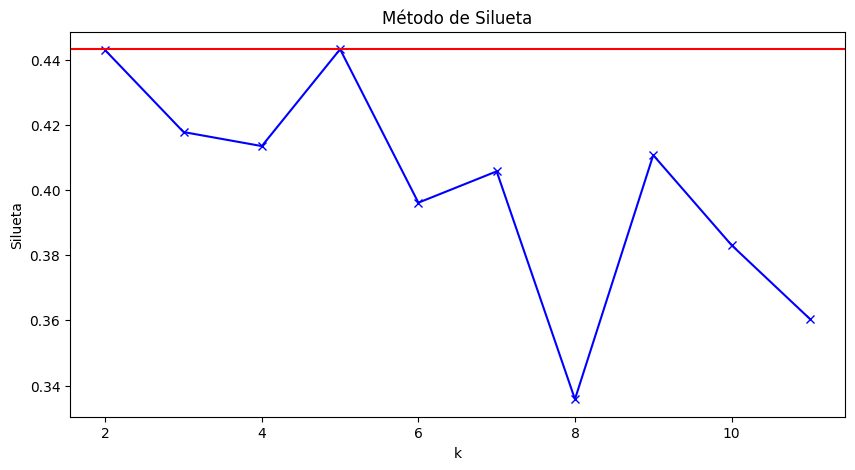

El número de clusters óptimo es 5


In [ ]:
# identificar el numero de clusters optimo usando el metodo de silhouette poniendo los valores de los puntos encontrados
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silueta')
plt.title('Método de Silueta')
# graficar una linea horizontal en el valor mayor
plt.axhline(y=max(silhouette), color='r', linestyle='-')
plt.show()


print(f'El número de clusters óptimo es {silhouette.index(max(silhouette)) + 2}')

Como se demuestra en lo anterior el número de clusteres óptimo es 5 

#### Clusterización con DBSCAN

Como muestra la clusterización por kmeans los grupos son de bastantes datos y los centros están cercanos entre ellos asi  


Para min_samples=5 y eps=0.5 se obtienen 5 clusters


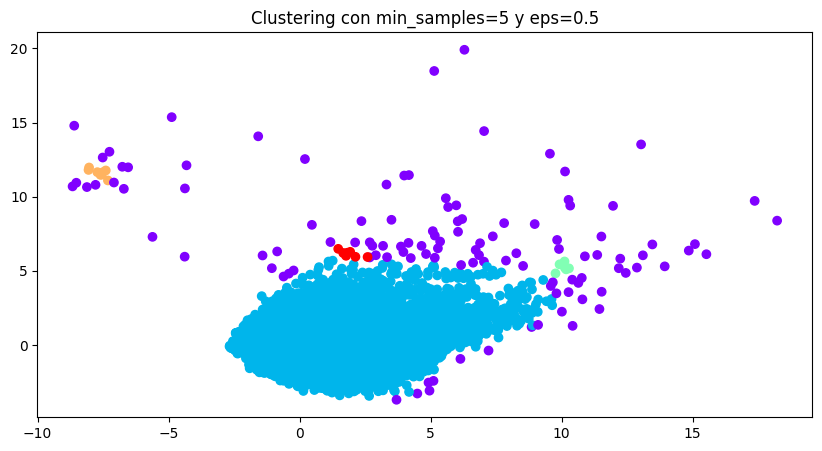

Para min_samples=10 y eps=0.3 se obtienen 5 clusters


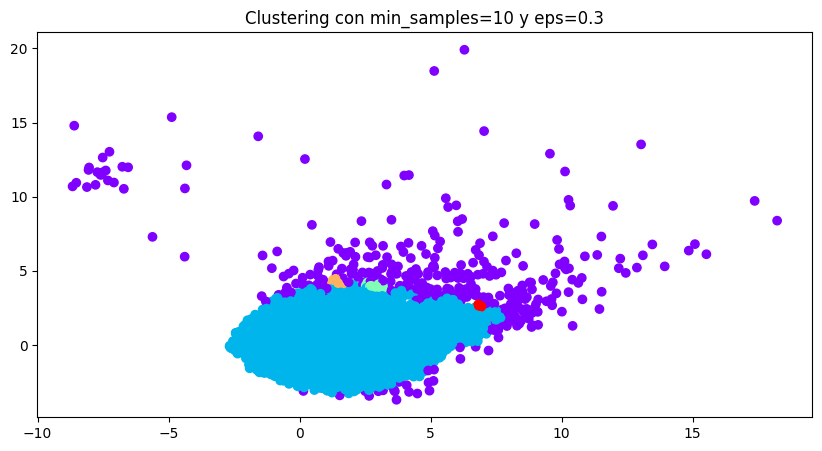

Para min_samples=20 y eps=0.2 se obtienen 5 clusters


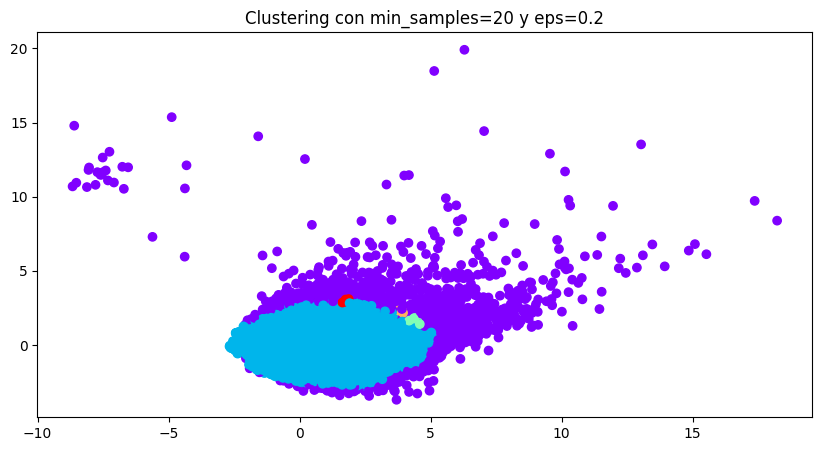

Para los 21 revisados, se obtienen 3 que tienen 5 clusters


In [ ]:
# definicion de 5 min_samples acordes con df_clustering
min_samples = [5, 10, 20]
# definicion de 5 eps acordes con df_clustering
eps = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9]

cluster = 0
cluster_5 = 0

# realizar el clustering con DBSCAN
from sklearn.cluster import DBSCAN
for sample in min_samples:
    for e in eps:
        dbscan = DBSCAN(eps=e, min_samples=sample)
        dbscan.fit(df_clustering)
        cluster += 1
        if len(np.unique(dbscan.labels_)) == 5:
            cluster_5 += 1
            print(f'Para min_samples={sample} y eps={e} se obtienen {len(np.unique(dbscan.labels_))} clusters')
            # grafiar la clusterizacion con el valor de min_samples y eps separando los clusters por colores y con lineas y como subgraficos por eps
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clustering[:, 0], df_clustering[:, 1], c=dbscan.labels_, cmap='rainbow')
            plt.title(f'Clustering con min_samples={sample} y eps={e}')
            plt.show()
print(f'Para los {cluster} revisados, se obtienen {cluster_5} que tienen 5 clusters')


Revisando los gráficos de clusterización notamos que los que logran realizar 5 clusters del método DBSCAN no se parecen a los encontrados con Kmeans debido a que DBSCAN clusteriza de manera circular dando resultados que no sirven para este conjunto de datos

#### Realización de asociaciones con el mejor algoritmo 

Ya que el algoritmo dio 5 clusters cambiaremos la definición anterior a la siguiente:

1. Clasificación por tipo de Cliente: Un ejemplo de clusterización sería:
- Cluster 1: Basic (Clientes con características asociadas a un nivel básico).
- Cluster 2: Silver (Clientes con un historial financiero sólido y mayor capacidad de crédito).
- Cluster 3: Gold (Clientes de nivel intermedio con comportamiento de gasto sólido).
- Cluster 4: Platinum (Clientes de alto valor con múltiples productos financieros).
- Cluster 5: Black (Clientes VIP con características exclusivas y alto poder adquisitivo).


Para ver los mínimos, máximos del df_clustering
Para esto usaremos las columnas 'Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'CUPO_L1', 'TC','CUPO_MX'

In [ ]:
# describe del df_clustering
df_clustering_complete.describe().T

count          mean           std    min       25%  \
Renta        51124.0  6.630771e+05  3.517356e+05    1.0  466965.5   
Edad         51124.0  3.870288e+01  1.330257e+01    9.0      28.0   
Antiguedad   51124.0  3.889615e+01  3.567255e+01    6.0      14.0   
Subsegmento  51124.0  1.820243e+02  2.927660e+01  151.0     160.0   
CUPO_L1      51124.0  1.133187e+06  1.076922e+06    0.0  400000.0   
TC           51124.0  1.732376e+00  8.774704e-01    1.0       1.0   
CUPO_MX      51124.0  1.400320e+03  1.597344e+03    0.0     300.0   

                       50%         75%         max  
Renta        663077.078726   709500.25  13089327.0  
Edad             35.000000       46.00       104.0  
Antiguedad       25.000000       54.00       324.0  
Subsegmento     170.000000      210.00       959.0  
CUPO_L1      800000.000000  1527000.00  21534000.0  
TC                2.000000        2.00        12.0  
CUPO_MX        1000.000000     1900.00     40000.0

In [ ]:
# lista de 5 personas
persona_1 = [350000,15,9,151,0,1,50]
persona_2 = [550000,20,50,160,40000,1,250]
persona_3 = [650000,25,100,170,70000,2,500]
persona_4 = [950000,30,200,300,150000,2,1500]
persona_5 = [13000000,45,300,500,220000,8,40000]

# lista de 5 personas normalizadas como data frame
df_personas = pd.DataFrame([persona_1, persona_2, persona_3, persona_4, persona_5], columns=['Renta', 'Edad', 'Antiguedad', 'Subsegmento', 'CUPO_L1', 'TC','CUPO_MX'])
print(df_personas)

# normalizar el df_personas
df_personas = scaler.transform(df_personas)

# predecir con 5 clusters miniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=5, batch_size=1000, random_state=42, n_init=10)
mbk.fit(df_personas)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_personas = pca.fit_transform(df_personas)

# imprimir a que cluster dependen las 5 personas
print(f'Las 5 personas pertenecen a los clusters {mbk.labels_}')






      Renta  Edad  Antiguedad  Subsegmento  CUPO_L1  TC  CUPO_MX
0    350000    15           9          151        0   1       50
1    550000    20          50          160    40000   1      250
2    650000    25         100          170    70000   2      500
3    950000    30         200          300   150000   2     1500
4  13000000    45         300          500   220000   8    40000
Las 5 personas pertenecen a los clusters [0 0 4 2 1]


con los datos entregados las personas quedaron asociadas en los grupos 0,0,4,2,1

#### 5% de Anomalia 

In [ ]:
# encontrar el 5 porciento de registros anómalos usando mezclas gaussianas
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

gm = GaussianMixture(n_components=5, random_state=42)
gm.fit(df_clustering_complete)
gm.predict_proba(df_clustering_complete).round(2)

densities = gm.score_samples(df_clustering_complete)
density_threshold = np.percentile(densities, 5)
anomalies = df_clustering_complete[densities < density_threshold]


anomalies

Renta  Edad  Antiguedad  Subsegmento  CUPO_L1  TC  CUPO_MX
6      1.022833e+06    48          21          811   813000   2    600.0
68     5.080000e+05    44         125          160  1000000   3   3400.0
114    4.848389e+06    47          66          170  2325000   2   1550.0
168    6.630771e+05    43         180          151  2086000   1   6325.0
180    6.630771e+05    47         117          151  3326000   2   7890.0
...             ...   ...         ...          ...      ...  ..      ...
51018  1.169333e+06    51          37          160  2973810   1      0.0
51024  6.630771e+05    47          72          170  4035000   1  10000.0
51057  1.398798e+06    47          70          170  3937000   3  12975.0
51065  2.160000e+05    52          14          151  4000000   2   6000.0
51102  4.670740e+05    49          58          160   900000   6    924.0

[2557 rows x 7 columns]